In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import catboost
from catboost import CatBoostClassifier

In [4]:
df = pd.read_csv("merged-csv-files.csv", sep=';' , low_memory=False)

In [60]:
df

Molecule ChEMBL ID Molecule Name Molecule Max Phase Molecular Weight  \
0           CHEMBL4644768           NaN                NaN           518.10   
1           CHEMBL4637803           NaN                NaN           518.10   
2               CHEMBL125   MILTEFOSINE                4.0           407.58   
3           CHEMBL4647513           NaN                NaN           586.10   
4               CHEMBL125   MILTEFOSINE                4.0           407.58   
...                   ...           ...                ...              ...   
278070      CHEMBL5197107           NaN                NaN           392.47   
278071      CHEMBL2178604           NaN                NaN           422.45   
278072        CHEMBL26006           NaN                NaN           317.36   
278073      CHEMBL5205037           NaN                NaN           403.45   
278074      CHEMBL5199171           NaN                NaN           478.56   

       #RO5 Violations AlogP Compound Key  \
0                    0  3.80          11e   
1                    0  3.80          11i   
2                    1  5.68           MF   
3                    1  4.82          11q   
4                    1  5.68           MF   
...                ...   ...          ...   
278070               0  1.85           4c   
278071               0  1.13           1f   
278072               0  2.35           3c   
278073               0  2.67           4i   
278074               0  2.03           5c   

                                                   Smiles Standard Type  \
0       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
1       CCn1c(=O)/c(=C/C=C2\Sc3c(F)cccc3N2C)s/c1=C\c1s...          IC50   
2              CCCCCCCCCCCCCCCCOP(=O)([O-])OCC[N+](C)(C)C    Inhibition   
3       CCn1c(=O)/c(=C/C=C2\Sc3cc(C(F)(F)F)ccc3N2C)s/c...    Inhibition   
4              CCCCCCCCCCCCCCCCOP(=O)([O-])OCC[N+](C)(C)C    Inhibition   
...                                                   ...           ...   
278070   CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N2CCCCC2)cc1          IC50   
278071  Nc1nc(N)c2nc(CNc3ccc(C(=O)N4CCC(C(=O)O)CC4)cc3...          IC50   
278072               Nc1nc(N)c2nc(CNc3cccc4ccccc34)cnc2n1          IC50   
278073     COc1ccc(Oc2ccc(CNCc3cnc4nc(N)nc(N)c4n3)cc2)cc1          IC50   
278074  CCOC(=O)C1CCN(C(=O)c2ccc(N(CC)Cc3cnc4nc(N)nc(N...          IC50   

       Standard Relation  ...     Target Type Document ChEMBL ID Source ID  \
0                    '='  ...        ORGANISM      CHEMBL4609989         1   
1                    NaN  ...        ORGANISM      CHEMBL4609989         1   
2                    NaN  ...        ORGANISM      CHEMBL4609989         1   
3                    '='  ...        ORGANISM      CHEMBL4609989         1   
4                    '='  ...        ORGANISM      CHEMBL4609989         1   
...                  ...  ...             ...                ...       ...   
278070               '='  ...  SINGLE PROTEIN      CHEMBL5143713         1   
278071               '='  ...  SINGLE PROTEIN      CHEMBL5143713         1   
278072               '='  ...  SINGLE PROTEIN      CHEMBL5143713         1   
278073               '='  ...  SINGLE PROTEIN      CHEMBL5143713         1   
278074               '='  ...  SINGLE PROTEIN      CHEMBL5143713         1   

           Source Description Document Journal Document Year Cell ChEMBL ID  \
0       Scientific Literature  Bioorg Med Chem          2020            NaN   
1       Scientific Literature  Bioorg Med Chem          2020            NaN   
2       Scientific Literature  Bioorg Med Chem          2020            NaN   
3       Scientific Literature  Bioorg Med Chem          2020            NaN   
4       Scientific Literature  Bioorg Med Chem          2020            NaN   
...                       ...              ...           ...            ...   
278070  Scientific Literature       J Med Chem          2022            NaN   
278071  Scientific Literature       J Med Chem 

In [5]:
columns_to_keep = ['Smiles', 'Standard Type', 'Standard Value','Standard Units']

def keep_columns(df, columns):
    return df[columns]

df = keep_columns(df, columns_to_keep)


In [6]:
# Checking the first few rows
print(df.head())

# Checking for basic info about the dataset
print(df.info())

# Descriptive statistics
print(df.describe())

                                              Smiles Standard Type  \
0  CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
1  CCn1c(=O)/c(=C/C=C2\Sc3c(F)cccc3N2C)s/c1=C\c1s...          IC50   
2         CCCCCCCCCCCCCCCCOP(=O)([O-])OCC[N+](C)(C)C    Inhibition   
3  CCn1c(=O)/c(=C/C=C2\Sc3cc(C(F)(F)F)ccc3N2C)s/c...    Inhibition   
4         CCCCCCCCCCCCCCCCOP(=O)([O-])OCC[N+](C)(C)C    Inhibition   

  Standard Value Standard Units  
0           88.9              %  
1            NaN            NaN  
2            NaN              %  
3           33.3              %  
4            4.0              %  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278075 entries, 0 to 278074
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Smiles          277415 non-null  object
 1   Standard Type   278052 non-null  object
 2   Standard Value  272386 non-null  object
 3   Standard Units  270747 non-null  ob

In [7]:
# Display the data types of the columns
print(df.dtypes)

# Selecting numerical columns for histogram
numerical_cols = df.select_dtypes(include=['int','float']).columns
print("Numerical or datetime columns:", numerical_cols)

# Plot histograms for numerical or datetime columns
if len(numerical_cols) > 0:
    df[numerical_cols].hist(bins=30, figsize=(20, 15))
    plt.show()
else:
    print("No numerical or datetime columns to plot.")

# Correlation matrix
if len(numerical_cols) > 0:
    corr_matrix = df[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()


Smiles            object
Standard Type     object
Standard Value    object
Standard Units    object
dtype: object
Numerical or datetime columns: Index([], dtype='object')
No numerical or datetime columns to plot.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


NameError: name 'corr_matrix' is not defined

<Figure size 1200x1000 with 0 Axes>

In [9]:
df = df.drop_duplicates(subset=['Smiles'])

In [10]:
column_name = 'Standard Type'
if column_name in df.columns and df[column_name].dtype == 'object':
    print(df[column_name].value_counts())
    print("***" * 10)

Standard Type
Percent Effect             68290
Inhibition                 14001
IC50                       11242
Potency                     3310
EC50                        1570
Activity                     877
PXC50                        578
GI                           514
IC90                         323
ED50                         293
Ki                           169
Ratio IC50                    57
LC50                          52
LD50                          47
Growth inhibition             42
Cytotoxicity                  40
ID50                          40
GI50                          36
Suppression                   34
Ratio EC50                    32
False                         24
Mortality inhibition          20
Leishmanicidal activity       18
Therapeutic index             17
MIC                           17
Delta Tm                      14
G index                       10
Kd                             9
FC                             9
Efficacy                     

In [11]:
desired_value = ['IC50', 'Percent Effect', 'Inhibition','EC50','IC90']

df = df[df['Standard Type'].isin(desired_value)]

In [12]:
df = pd.read_csv("df.csv", sep=',' , low_memory=False)

In [13]:
df.shape

(94435, 5)

In [72]:
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Smiles, Standard Type, Standard Value, Standard Units]
Index: []


In [73]:
df.duplicated().sum()

0

In [74]:
df.isnull().sum()/df.shape[0]*100

Smiles            0.001048
Standard Type     0.000000
Standard Value    1.037453
Standard Units    0.783853
dtype: float64

In [77]:
df = df.dropna(subset=['Standard Units'])

In [78]:
df.to_csv("df.csv")

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Standard Value']] = scaler.fit_transform(df[['Standard Value']])


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94435 entries, 0 to 278055
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Smiles          94435 non-null  object
 1   Standard Type   94435 non-null  object
 2   Standard Value  94435 non-null  object
 3   Standard Units  94435 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Standard Value']] = scaler.fit_transform(df[['Standard Value']])


In [80]:
df

Smiles Standard Type  \
0       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
3       CCn1c(=O)/c(=C/C=C2\Sc3cc(C(F)(F)F)ccc3N2C)s/c...    Inhibition   
5       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
6       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
7       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
...                                                   ...           ...   
277950       O=C1c2cccc(O)c2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   
278005      COc1cccc2c1C(=O)c1c(oc3c1c(=O)oc1ccccc13)C2=O    Inhibition   
278007  CC(=O)Oc1cccc2c1C(=O)c1c(oc3c1c(=O)oc1ccccc13)...    Inhibition   
278055      COc1cccc2c1C(=O)c1oc3c(c1C2=O)c(=O)oc1ccccc13    Inhibition   

       Standard Value Standard Units  
0                88.9              %  
3                33.3              %  
5                36.8              %  
6                66.2              %  
7                92.8              %  
...               ...            ...  
277950           -5.5              %  
278003       100000.0             nM  
278005           2.98              %  
278007         -18.99              %  
278055          -3.51              %  

[94435 rows x 4 columns]

In [81]:
column_name = 'Standard Type'
if column_name in df.columns and df[column_name].dtype == 'object':
    print(df[column_name].value_counts())
    print("***" * 10)

Standard Type
Percent Effect    68290
Inhibition        13784
IC50              10577
EC50               1509
IC90                275
Name: count, dtype: int64
******************************


In [82]:
desired_value = ['%','nM']
df = df[df['Standard Units'].isin(desired_value)]

In [83]:
df['Standard Value'] = pd.to_numeric(df['Standard Value'], errors='coerce')

# Filter out rows where 'A' is non-negative
df = df[df['Standard Value'] >= 0]


/var/folders/gm/brh165c568qf0d9ggn2qd6zr0000gn/T/ipykernel_8189/4155324239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Standard Value'] = pd.to_numeric(df['Standard Value'], errors='coerce')


In [96]:
df

Smiles Standard Type  \
0       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
3       CCn1c(=O)/c(=C/C=C2\Sc3cc(C(F)(F)F)ccc3N2C)s/c...    Inhibition   
5       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
6       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
7       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
...                                                   ...           ...   
277730    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
277827                   O=C1NC(=O)/C(=C/c2c(F)cccc2Br)S1    Inhibition   
277870    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   
278005      COc1cccc2c1C(=O)c1c(oc3c1c(=O)oc1ccccc13)C2=O    Inhibition   

        Standard Value Standard Units  
0                88.90              %  
3                33.30              %  
5                36.80              %  
6                66.20              %  
7                92.80              %  
...                ...            ...  
277730            5.16              %  
277827           36.00              %  
277870            6.19              %  
278003       100000.00             nM  
278005            2.98              %  

[83927 rows x 4 columns]

In [85]:
df = df.copy()
df.rename(columns={'Standard Value.1': 'Standard Value'}, inplace=True)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Standard Value']] = scaler.fit_transform(df[['Standard Value']])


In [87]:
df = df.loc[:, ~df.columns.duplicated()]

In [88]:
duplicates = df.columns[df.columns.duplicated()].tolist()
print("Duplicate columns:", duplicates)

Duplicate columns: []


In [144]:
attribute = 'Standard Type'
specific_value = ['IC50','EC50','IC90']
df_nM = df[df['Standard Type'].isin(specific_value)]
df_nM.to_csv('df_nM.csv',index = False)

In [145]:
df_nM

Smiles Standard Type  \
14      CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
28      CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
36      C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
106               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
108                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                   ...           ...   
277689  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
277718  COc1cc2c(c(OC)c1OC)C(c1ccc(C(F)(F)F)cc1)C1=C(C...          IC50   
277723  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
277727  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

        Standard Value Standard Units  
14                40.0             nM  
28                81.0             nM  
36               108.0             nM  
106            30000.0             nM  
108            34200.0             nM  
...                ...            ...  
277689         91780.0             nM  
277718          6220.0             nM  
277723         31800.0             nM  
277727         30100.0             nM  
278003        100000.0             nM  

[10418 rows x 4 columns]

In [99]:
attribute = 'Standard Type'
specific_value = ['Percent Effect','Inhibition']
df_percent = df[df['Standard Type'].isin(specific_value)]
df_percent.to_csv('df_percent.csv',index = False)

In [100]:
df_percent

Smiles Standard Type  \
0       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
3       CCn1c(=O)/c(=C/C=C2\Sc3cc(C(F)(F)F)ccc3N2C)s/c...    Inhibition   
5       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
6       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
7       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
...                                                   ...           ...   
277565                         COc1cc(OC)c2ccc(=O)oc2c1OC    Inhibition   
277730    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
277827                   O=C1NC(=O)/C(=C/c2c(F)cccc2Br)S1    Inhibition   
277870    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   
278005      COc1cccc2c1C(=O)c1c(oc3c1c(=O)oc1ccccc13)C2=O    Inhibition   

        Standard Value Standard Units  
0                88.90              %  
3                33.30              %  
5                36.80              %  
6                66.20              %  
7                92.80              %  
...                ...            ...  
277565           91.00              %  
277730            5.16              %  
277827           36.00              %  
277870            6.19              %  
278005            2.98              %  

[73509 rows x 4 columns]

In [93]:
from scipy import stats
import numpy as np

df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83927 entries, 0 to 278005
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Smiles          83927 non-null  object 
 1   Standard Type   83927 non-null  object 
 2   Standard Value  83927 non-null  float64
 3   Standard Units  83927 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [37]:
 !pip install rdkit


In [101]:
df_nM = pd.read_csv("df_nM.csv")

In [102]:
df_nM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10418 entries, 0 to 10417
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Smiles          10418 non-null  object 
 1   Standard Type   10418 non-null  object 
 2   Standard Value  10418 non-null  float64
 3   Standard Units  10418 non-null  object 
dtypes: float64(1), object(3)
memory usage: 325.7+ KB


In [146]:
def classify_value1(value):
    if value >= 10000 :
        return "inactive"
    elif value <= 1000 :
        return "active"
    else:
        return "intermediate"


In [147]:
df_nM['Activity'] = df_nM['Standard Value'].apply(classify_value1)
df_nM

/var/folders/gm/brh165c568qf0d9ggn2qd6zr0000gn/T/ipykernel_8189/1136578983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nM['Activity'] = df_nM['Standard Value'].apply(classify_value1)


Smiles Standard Type  \
14      CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
28      CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
36      C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
106               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
108                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                   ...           ...   
277689  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
277718  COc1cc2c(c(OC)c1OC)C(c1ccc(C(F)(F)F)cc1)C1=C(C...          IC50   
277723  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
277727  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

        Standard Value Standard Units      Activity  
14                40.0             nM        active  
28                81.0             nM        active  
36               108.0             nM        active  
106            30000.0             nM      inactive  
108            34200.0             nM      inactive  
...                ...            ...           ...  
277689         91780.0             nM      inactive  
277718          6220.0             nM  intermediate  
277723         31800.0             nM      inactive  
277727         30100.0             nM      inactive  
278003        100000.0             nM      inactive  

[10418 rows x 5 columns]

In [148]:
activity_mapping = {
    'active': 2.0,
    'intermediate': 0.0,
    'inactive': 1.0
}
df_nM['Activity'] = df_nM['Activity'].map(activity_mapping)
df_nM

/var/folders/gm/brh165c568qf0d9ggn2qd6zr0000gn/T/ipykernel_8189/1317749972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nM['Activity'] = df_nM['Activity'].map(activity_mapping)


Smiles Standard Type  \
14      CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
28      CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
36      C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
106               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
108                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                   ...           ...   
277689  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
277718  COc1cc2c(c(OC)c1OC)C(c1ccc(C(F)(F)F)cc1)C1=C(C...          IC50   
277723  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
277727  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

        Standard Value Standard Units  Activity  
14                40.0             nM       2.0  
28                81.0             nM       2.0  
36               108.0             nM       2.0  
106            30000.0             nM       1.0  
108            34200.0             nM       1.0  
...                ...            ...       ...  
277689         91780.0             nM       1.0  
277718          6220.0             nM       0.0  
277723         31800.0             nM       1.0  
277727         30100.0             nM       1.0  
278003        100000.0             nM       1.0  

[10418 rows x 5 columns]

In [149]:
df_nM = df_nM[df_nM['Activity'] != 0.0]

In [150]:
df_nM

Smiles Standard Type  \
14      CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
28      CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
36      C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
106               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
108                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                   ...           ...   
277687         N#Cc1c(/N=C/c2c3ccccc3nc3ccccc23)sc2c1CCC2          EC50   
277689  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
277723  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
277727  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

        Standard Value Standard Units  Activity  
14                40.0             nM       2.0  
28                81.0             nM       2.0  
36               108.0             nM       2.0  
106            30000.0             nM       1.0  
108            34200.0             nM       1.0  
...                ...            ...       ...  
277687        500000.0             nM       1.0  
277689         91780.0             nM       1.0  
277723         31800.0             nM       1.0  
277727         30100.0             nM       1.0  
278003        100000.0             nM       1.0  

[7393 rows x 5 columns]

In [155]:
df_nM

Smiles Standard Type  \
14      CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
28      CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
36      C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
106               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
108                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                   ...           ...   
277686   COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C#N)CCCCC4)c2c1          EC50   
277689  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
277723  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
277727  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

        Standard Value Standard Units  Activity  Log_Standard_Value  
14                40.0             nM       2.0            3.713572  
28                81.0             nM       2.0            4.406719  
36               108.0             nM       2.0            4.691348  
106            30000.0             nM       1.0           10.308986  
108            34200.0             nM       1.0           10.440010  
...                ...            ...       ...                 ...  
277686         32260.0             nM       1.0           10.381614  
277689         91780.0             nM       1.0           11.427161  
277723         31800.0             nM       1.0           10.367253  
277727         30100.0             nM       1.0           10.312314  
278003        100000.0             nM       1.0           11.512935  

[6993 rows x 6 columns]

In [152]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.20)
    Q3 = df[column].quantile(0.80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [153]:
df_nM = remove_outliers(df_nM, 'Standard Value')

In [154]:
# Apply log transformation
df_nM['Log_Standard_Value'] = np.log1p(df_nM['Standard Value'])

/var/folders/gm/brh165c568qf0d9ggn2qd6zr0000gn/T/ipykernel_8189/72994006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nM['Log_Standard_Value'] = np.log1p(df_nM['Standard Value'])


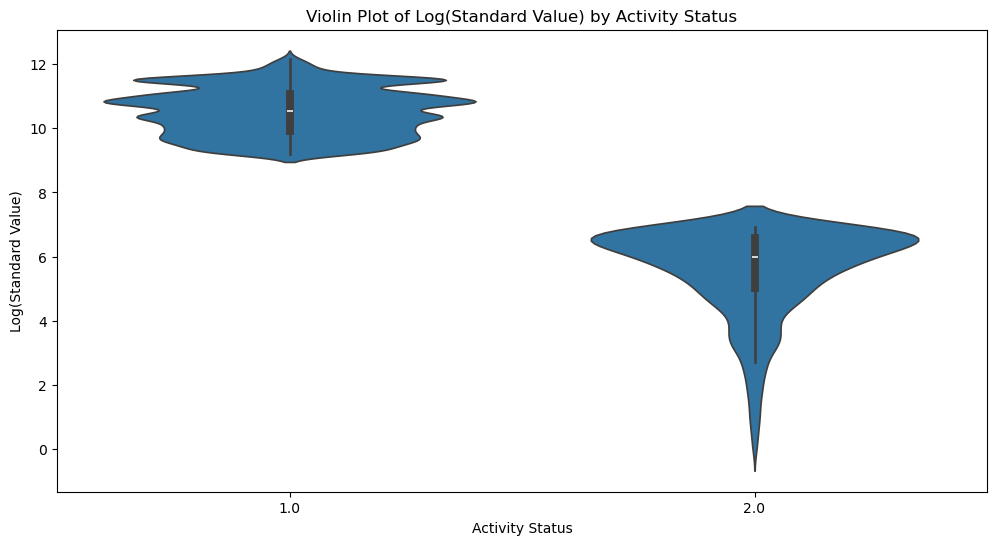

In [156]:
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Activity', y='Log_Standard_Value', data=df_nM)
plt.title('Violin Plot of Log(Standard Value) by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Log(Standard Value)')
plt.show()

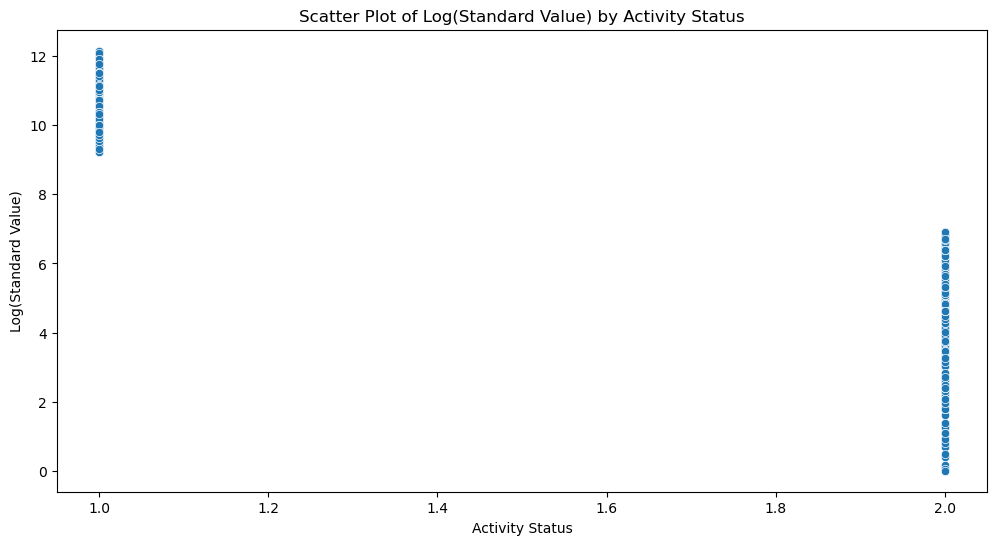

In [157]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Activity', y='Log_Standard_Value', data=df_nM)
plt.title('Scatter Plot of Log(Standard Value) by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Log(Standard Value)')
plt.show()

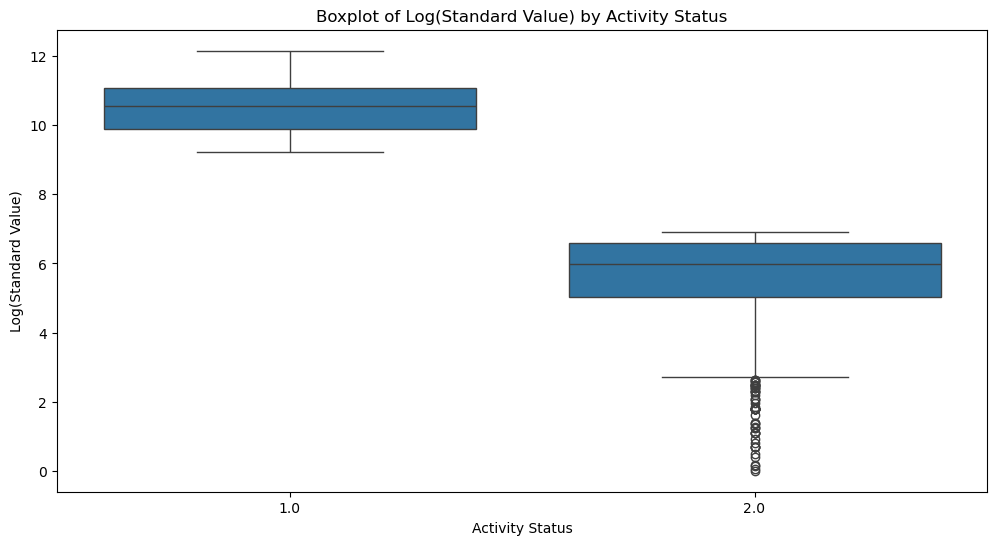

In [159]:
# If you still want a boxplot, here's how to create it with the cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='Log_Standard_Value', data=df_nM)
plt.title('Boxplot of Log(Standard Value) by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Log(Standard Value)')
plt.show()

In [160]:
df_nM

Smiles Standard Type  \
14      CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
28      CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
36      C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
106               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
108                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                   ...           ...   
277686   COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C#N)CCCCC4)c2c1          EC50   
277689  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
277723  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
277727  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

        Standard Value Standard Units  Activity  Log_Standard_Value  
14                40.0             nM       2.0            3.713572  
28                81.0             nM       2.0            4.406719  
36               108.0             nM       2.0            4.691348  
106            30000.0             nM       1.0           10.308986  
108            34200.0             nM       1.0           10.440010  
...                ...            ...       ...                 ...  
277686         32260.0             nM       1.0           10.381614  
277689         91780.0             nM       1.0           11.427161  
277723         31800.0             nM       1.0           10.367253  
277727         30100.0             nM       1.0           10.312314  
278003        100000.0             nM       1.0           11.512935  

[6993 rows x 6 columns]

In [161]:
df_nM

Smiles Standard Type  \
14      CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
28      CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
36      C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
106               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
108                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                   ...           ...   
277686   COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C#N)CCCCC4)c2c1          EC50   
277689  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
277723  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
277727  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
278003         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

        Standard Value Standard Units  Activity  Log_Standard_Value  
14                40.0             nM       2.0            3.713572  
28                81.0             nM       2.0            4.406719  
36               108.0             nM       2.0            4.691348  
106            30000.0             nM       1.0           10.308986  
108            34200.0             nM       1.0           10.440010  
...                ...            ...       ...                 ...  
277686         32260.0             nM       1.0           10.381614  
277689         91780.0             nM       1.0           11.427161  
277723         31800.0             nM       1.0           10.367253  
277727         30100.0             nM       1.0           10.312314  
278003        100000.0             nM       1.0           11.512935  

[6993 rows x 6 columns]

In [162]:
column_name = 'Activity'
if column_name in df_nM.columns and df_nM[column_name].dtype == 'float':
    print(df_nM[column_name].value_counts())
    print("***" * 10)

Activity
1.0    5877
2.0    1116
Name: count, dtype: int64
******************************


In [163]:
df_nM.to_csv("df_nM.csv")

In [4]:
df_nM_AP = pd.read_csv("df_nM_AP.csv")

In [15]:
df_nM_AP


Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3                3           3   
4                4           4   
...            ...         ...   
6882          6882       10465   
6883          6883       10467   
6884          6884       10469   
6885          6885       10470   
6886          6886       10471   

                                                 Smiles Standard Type  \
0     CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
1     CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
2     C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
3               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
4                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                 ...           ...   
6882   COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C#N)CCCCC4)c2c1          EC50   
6883  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
6884  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
6885  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
6886         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

      Standard Value  Activity  AtomPair_0  AtomPair_1  AtomPair_2  \
0               40.0       2.0           0           0           0   
1               81.0       2.0           0           0           0   
2              108.0       2.0           1           1           1   
3            30000.0       1.0           1           1           0   
4            34200.0       1.0           0           0           0   
...              ...       ...         ...         ...         ...   
6882         32260.0       1.0           0           0           0   
6883         91780.0       1.0           1           1           0   
6884         31800.0       1.0           0           0           0   
6885         30100.0       1.0           1           1           1   
6886        100000.0       1.0           1           1           1   

      AtomPair_3  ...  AtomPair_2038  AtomPair_2039  AtomPair_2040  \
0              0  ...              0              0              0   
1              0  ...              0              0              0   
2              0  ...              0              0              1   
3              0  ...              0              0              0   
4              0  ...              0              0              0   
...          ...  ...            ...            ...            ...   
6882           0  ...              0              0              1   
6883           0  ...              0              0              1   
6884           0  ...              0              0              0   
6885           0  ...              0              0              0   
6886           0  ...              0              0              0   

      AtomPair_2041  AtomPair_2042  AtomPair_2043  AtomPair_2044  \
0                 0              0              0              1   
1                 0              0              0              1   
2                 1              1              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
6882              1              0              0              1   
6883              1              0              0              0   
6884              0              0              0              1   
6885              0              0              0              0   
6886              0              0              0              1   

      AtomPair_2045  AtomPair_2046  AtomPair_2047  
0                 0              0              0  
1                 0              0              0  
2                 0              0              0  
3            

In [8]:
X = df_nM_AP.drop(columns=['Smiles','Standard Type','Activity','Standard Value','Unnamed: 0','Unnamed: 0.1'], axis=1)
X

AtomPair_0  AtomPair_1  AtomPair_2  AtomPair_3  AtomPair_4  AtomPair_5  \
0              0           0           0           0           1           1   
1              0           0           0           0           1           1   
2              1           1           1           0           1           0   
3              1           1           0           0           1           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
6882           0           0           0           0           1           1   
6883           1           1           0           0           0           0   
6884           0           0           0           0           1           1   
6885           1           1           1           0           1           1   
6886           1           1           1           0           1           1   

      AtomPair_6  AtomPair_7  AtomPair_8  AtomPair_9  ...  AtomPair_2038  \
0              1           0           0           0  ...              0   
1              1           1           0           0  ...              0   
2              0           0           1           0  ...              0   
3              0           0           0           0  ...              0   
4              0           0           0           0  ...              0   
...          ...         ...         ...         ...  ...            ...   
6882           1           0           0           0  ...              0   
6883           0           0           0           0  ...              0   
6884           1           0           0           0  ...              0   
6885           1           0           0           0  ...              0   
6886           1           0           0           0  ...              0   

      AtomPair_2039  AtomPair_2040  AtomPair_2041  AtomPair_2042  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              1              1              1   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
6882              0              1              1              0   
6883              0              1              1              0   
6884              0              0              0              0   
6885              0              0              0              0   
6886              0              0              0              0   

      AtomPair_2043  AtomPair_2044  AtomPair_2045  AtomPair_2046  \
0                 0              1              0              0   
1                 0              1              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
6882              0              1              0              0   
6883              0              0              0              0   
6884              0              1              0              0   
6885              0              0              0              0   
6886              0              1              1              0   

      AtomPair_2047  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
6882              0  
6883              0  
6884              0  
6885              0  
6886              0  

[6887 rows x 2048 columns]

In [5]:
columns_to_keep = ['Smiles', 'Standard Type', 'Standard Value','Activity']

def keep_columns(df, columns):
    return df[columns]

df_nM = keep_columns(df_nM_AP, columns_to_keep)


In [6]:
df_nM


Smiles Standard Type  \
0     CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
1     CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
2     C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
3               Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
4                     COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   
...                                                 ...           ...   
6882   COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C#N)CCCCC4)c2c1          EC50   
6883  O=c1cc(-c2ccccc2)c2ccc(O[C@@H]3O[C@H](CO)[C@@H...          IC50   
6884  COc1ccc2nc3cc(Cl)ccc3c(Nc3sc4c(c3C(N)=O)CCCC4)...          EC50   
6885  CCCc1cc(=O)oc2c(C(=O)C(C)CC)c(O)c(CC=C(C)C)c(O...          IC50   
6886         Cl.Fc1ccc(N(CCNCCCc2ccccc2)c2ccc(F)cc2)cc1          IC50   

      Standard Value  Activity  
0               40.0       2.0  
1               81.0       2.0  
2              108.0       2.0  
3            30000.0       1.0  
4            34200.0       1.0  
...              ...       ...  
6882         32260.0       1.0  
6883         91780.0       1.0  
6884         31800.0       1.0  
6885         30100.0       1.0  
6886        100000.0       1.0  

[6887 rows x 4 columns]

In [11]:
Y = df_nM['Activity']
Y

0       2.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
6882    1.0
6883    1.0
6884    1.0
6885    1.0
6886    1.0
Name: Activity, Length: 6887, dtype: float64

In [20]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import ast


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

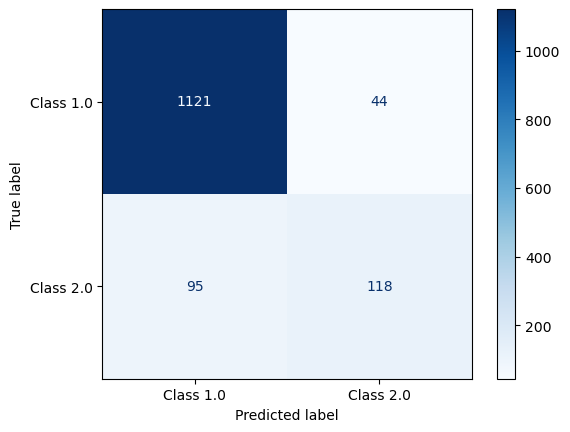

In [301]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred, labels=[1.0, 2.0])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1.0', 'Class 2.0'])
disp.plot(cmap='Blues')
plt.show()


In [385]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_resampled, Y_resampled )

RandomForestClassifier(random_state=42)

In [386]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model1.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep1 = classification_report(Y_test, y_pred)
print(rep1)

0.9013062409288825
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94      1165
         2.0       0.75      0.54      0.63       213

    accuracy                           0.90      1378
   macro avg       0.84      0.75      0.78      1378
weighted avg       0.89      0.90      0.89      1378



In [403]:
feature_names = X_resampled.columns

In [404]:
importances1 = model1.feature_importances_

In [405]:
# Check the length of feature names and importances
print(f"Number of features: {len(feature_names)}")
print(f"Number of importances: {len(importances)}")

Number of features: 2048
Number of importances: 2048


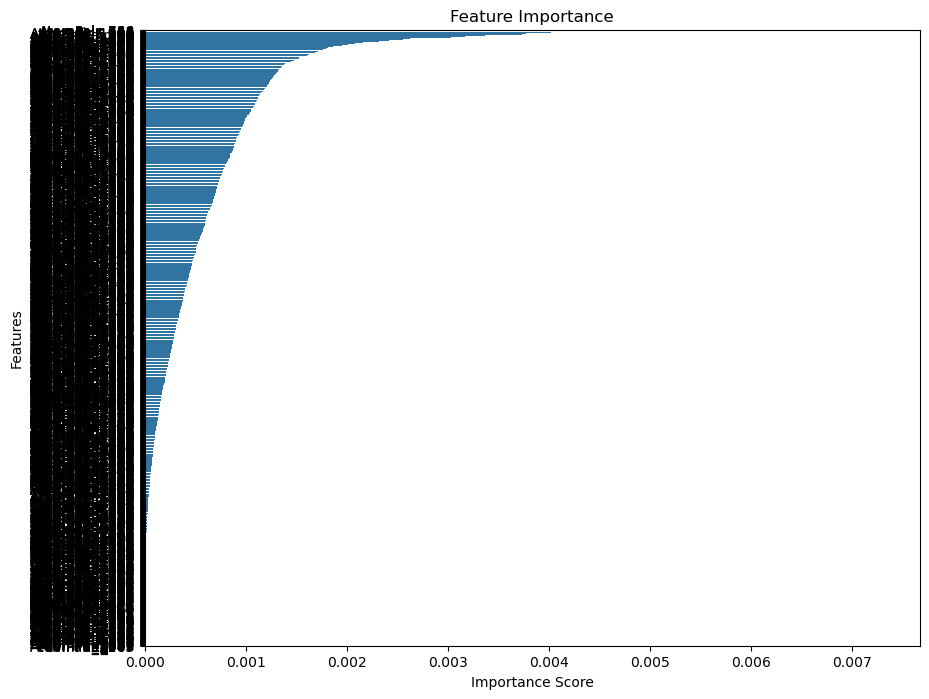

In [406]:
# Ensure feature names match the features used for training
feature_names = X_resampled.columns if isinstance(X_train, pd.DataFrame) else feature_names

# Check lengths
if len(feature_names) == len(importances):
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances1
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("Mismatch in the number of features and importances. Please check your data.")


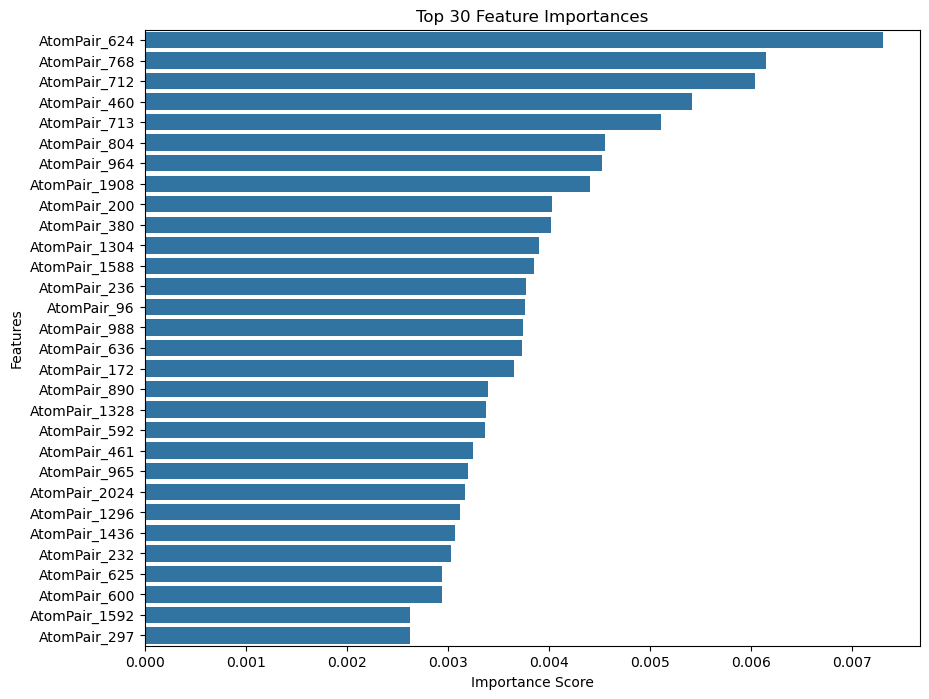

In [407]:
top_30_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(30)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_30_features)
plt.title('Top 30 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [330]:
model2 = LogisticRegression(random_state=42)
model2.fit(X_resampled, Y_resampled)

LogisticRegression(random_state=42)

In [331]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model2.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep2 = classification_report(Y_test, y_pred,output_dict=True)
print(rep2)

0.7910014513788098
{'1.0': {'precision': 0.9034038638454461, 'recall': 0.8429184549356223, 'f1-score': 0.872113676731794, 'support': 1165.0}, '2.0': {'precision': 0.3711340206185567, 'recall': 0.5070422535211268, 'f1-score': 0.42857142857142855, 'support': 213.0}, 'accuracy': 0.7910014513788098, 'macro avg': {'precision': 0.6372689422320015, 'recall': 0.6749803542283745, 'f1-score': 0.6503425526516112, 'support': 1378.0}, 'weighted avg': {'precision': 0.8211299330708979, 'recall': 0.7910014513788098, 'f1-score': 0.8035545338739146, 'support': 1378.0}}


In [412]:
model3 = GradientBoostingClassifier(random_state=42)
model3.fit(X_resampled, Y_resampled)

GradientBoostingClassifier(random_state=42)

In [413]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model3.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep3 = classification_report(Y_test, y_pred)
print(rep3)

0.8425253991291727
              precision    recall  f1-score   support

         1.0       0.92      0.89      0.91      1165
         2.0       0.49      0.57      0.53       213

    accuracy                           0.84      1378
   macro avg       0.71      0.73      0.72      1378
weighted avg       0.85      0.84      0.85      1378



In [414]:
feature_names = X.columns

In [415]:
importances3 = model3.feature_importances_

In [421]:
# Check the length of feature names and importances
print(f"Number of features: {len(feature_names)}")
print(f"Number of importances: {len(importances3)}")

Number of features: 2048
Number of importances: 2048


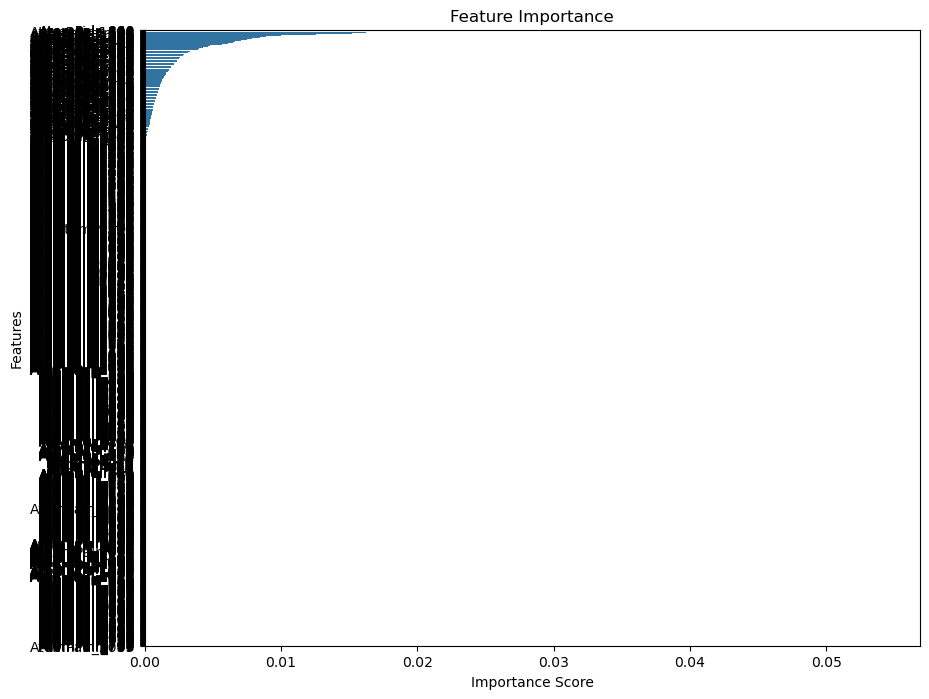

In [419]:
# Ensure feature names match the features used for training
feature_names = X_resampled.columns if isinstance(X_train, pd.DataFrame) else feature_names

# Check lengths
if len(feature_names) == len(importances):
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances3
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("Mismatch in the number of features and importances. Please check your data.")

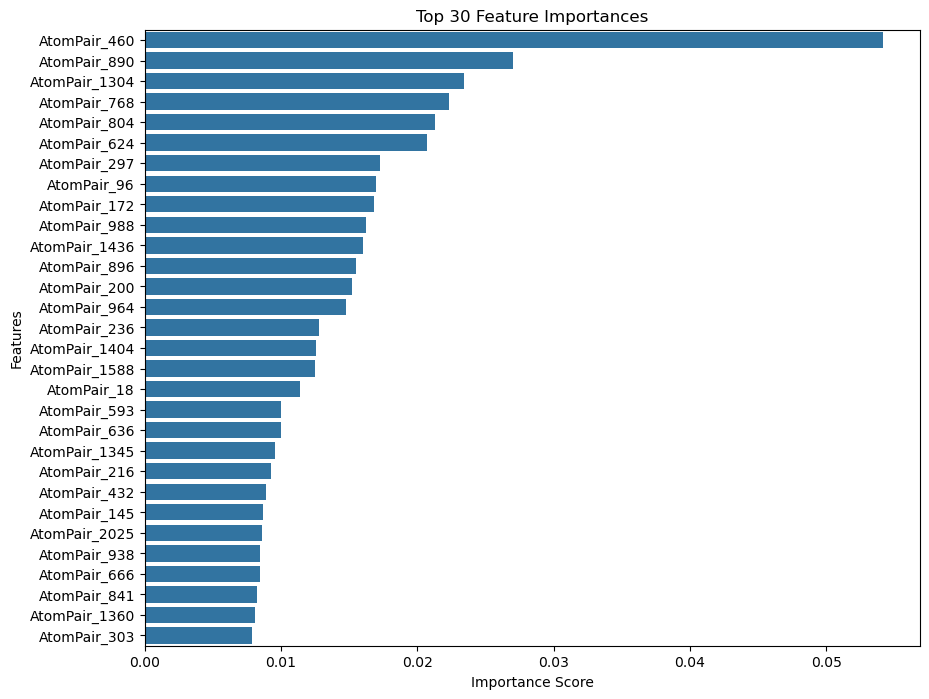

In [420]:
top_30_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(30)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_30_features)
plt.title('Top 30 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [335]:
model4 = KNeighborsClassifier()
model4.fit(X_resampled, Y_resampled)

KNeighborsClassifier()

In [336]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model4.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep4 = classification_report(Y_test, y_pred,output_dict=True)
print(rep4)

0.8294629898403484
{'1.0': {'precision': 0.9622266401590457, 'recall': 0.8309012875536481, 'f1-score': 0.8917549516351911, 'support': 1165.0}, '2.0': {'precision': 0.47043010752688175, 'recall': 0.8215962441314554, 'f1-score': 0.5982905982905983, 'support': 213.0}, 'accuracy': 0.8294629898403484, 'macro avg': {'precision': 0.7163283738429638, 'recall': 0.8262487658425517, 'f1-score': 0.7450227749628947, 'support': 1378.0}, 'weighted avg': {'precision': 0.886208743605598, 'recall': 0.8294629898403484, 'f1-score': 0.8463936256102287, 'support': 1378.0}}


In [337]:
model5 = SVC()
model5.fit(X_resampled, Y_resampled)

SVC()

In [338]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model5.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep5 = classification_report(Y_test, y_pred,output_dict=True)
print(rep5)

0.8991291727140783
{'1.0': {'precision': 0.9289297658862876, 'recall': 0.9536480686695279, 'f1-score': 0.941126641253706, 'support': 1165.0}, '2.0': {'precision': 0.7032967032967034, 'recall': 0.6009389671361502, 'f1-score': 0.6481012658227848, 'support': 213.0}, 'accuracy': 0.8991291727140783, 'macro avg': {'precision': 0.8161132345914954, 'recall': 0.7772935179028391, 'f1-score': 0.7946139535382455, 'support': 1378.0}, 'weighted avg': {'precision': 0.8940532475034273, 'recall': 0.8991291727140783, 'f1-score': 0.8958331688540063, 'support': 1378.0}}


In [40]:
lr = lr = LogisticRegression(solver='saga',max_iter=3000,random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(probability=True)
dt = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
nb = GaussianNB()
mlp = MLPClassifier(random_state=42)

In [340]:
model6 = DecisionTreeClassifier(random_state=42)
model6.fit(X_resampled, Y_resampled)

DecisionTreeClassifier(random_state=42)

In [341]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model6.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep6 = classification_report(Y_test, y_pred,output_dict=True)
print(rep6)

0.8047895500725689
{'1.0': {'precision': 0.9125230202578268, 'recall': 0.8506437768240344, 'f1-score': 0.8804975566414927, 'support': 1165.0}, '2.0': {'precision': 0.4041095890410959, 'recall': 0.5539906103286385, 'f1-score': 0.46732673267326735, 'support': 213.0}, 'accuracy': 0.8047895500725689, 'macro avg': {'precision': 0.6583163046494613, 'recall': 0.7023171935763364, 'f1-score': 0.67391214465738, 'support': 1378.0}, 'weighted avg': {'precision': 0.8339366190610462, 'recall': 0.8047895500725689, 'f1-score': 0.816632980803153, 'support': 1378.0}}


In [342]:
model7 = AdaBoostClassifier(random_state=42)
model7.fit(X_resampled, Y_resampled)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [343]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model7.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep7 = classification_report(Y_test, y_pred,output_dict=True)
print(rep7)

0.7351233671988389
{'1.0': {'precision': 0.9073319755600815, 'recall': 0.7648068669527897, 'f1-score': 0.8299953423381462, 'support': 1165.0}, '2.0': {'precision': 0.30808080808080807, 'recall': 0.5727699530516432, 'f1-score': 0.4006568144499179, 'support': 213.0}, 'accuracy': 0.7351233671988389, 'macro avg': {'precision': 0.6077063918204448, 'recall': 0.6687884100022164, 'f1-score': 0.6153260783940321, 'support': 1378.0}, 'weighted avg': {'precision': 0.8147046180324433, 'recall': 0.7351233671988389, 'f1-score': 0.7636316947037538, 'support': 1378.0}}


In [344]:
model8 = GaussianNB()
model8.fit(X_resampled, Y_resampled)

GaussianNB()

In [345]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model8.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep8 = classification_report(Y_test, y_pred,output_dict=True)
print(rep8)

0.6480406386066764
{'1.0': {'precision': 0.8820224719101124, 'recall': 0.6738197424892703, 'f1-score': 0.7639902676399026, 'support': 1165.0}, '2.0': {'precision': 0.22131147540983606, 'recall': 0.5070422535211268, 'f1-score': 0.30813124108416545, 'support': 213.0}, 'accuracy': 0.6480406386066764, 'macro avg': {'precision': 0.5516669736599742, 'recall': 0.5904309980051985, 'f1-score': 0.536060754362034, 'support': 1378.0}, 'weighted avg': {'precision': 0.7798951553248011, 'recall': 0.6480406386066764, 'f1-score': 0.6935272976425354, 'support': 1378.0}}


In [346]:
model9 = MLPClassifier(random_state=42)
model9.fit(X_resampled, Y_resampled)

MLPClassifier(random_state=42)

In [347]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model9.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep9 = classification_report(Y_test, y_pred,output_dict=True)
print(rep9)

0.8947750362844702
{'1.0': {'precision': 0.934412265758092, 'recall': 0.9416309012875537, 'f1-score': 0.9380076955964087, 'support': 1165.0}, '2.0': {'precision': 0.6666666666666666, 'recall': 0.6384976525821596, 'f1-score': 0.6522781774580336, 'support': 213.0}, 'accuracy': 0.8947750362844702, 'macro avg': {'precision': 0.8005394662123793, 'recall': 0.7900642769348567, 'f1-score': 0.7951429365272211, 'support': 1378.0}, 'weighted avg': {'precision': 0.8930263349841635, 'recall': 0.8947750362844702, 'f1-score': 0.8938419573065148, 'support': 1378.0}}


In [41]:
from sklearn.ensemble import RandomForestClassifier

model0 = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('gb', gb), ('knn', knn), ('svc', svc), ('dt', dt),('ada', ada), ('nb', nb), ('mlp', mlp)],
    voting='soft'
)
model0.fit(X_resampled, Y_resampled )

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=3000, random_state=42,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('nb', GaussianNB()),
                             ('mlp', MLPClassifier(random_state=42))],
                 voting='soft')

In [42]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model0.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep0 = classification_report(Y_test, y_pred)
print(rep0)

0.895500725689405
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94      1165
         2.0       0.66      0.68      0.67       213

    accuracy                           0.90      1378
   macro avg       0.80      0.81      0.80      1378
weighted avg       0.90      0.90      0.90      1378



In [449]:
from sklearn.metrics import classification_report
reports = [rep1,rep2,rep3,rep4,rep5,rep6,rep7,rep8,rep9,rep0]
def extract_metrics(report):
    metrics = {
        'accuracy': report['accuracy'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1': report['macro avg']['f1-score']
    }
    return metrics

metrics_list = [extract_metrics(report) for report in reports]


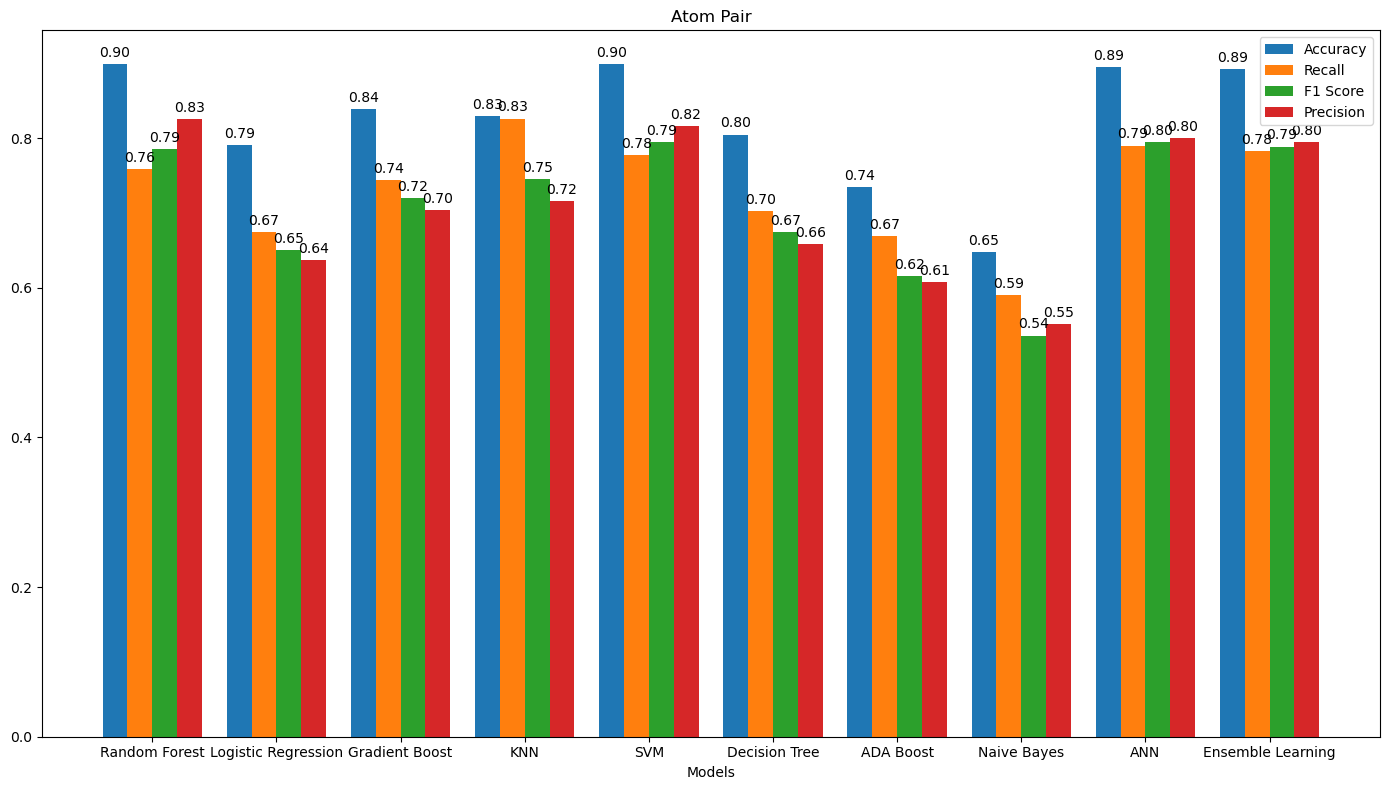

In [351]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Logistic Regression', 'Gradient Boost', 'KNN', 'SVM', 'Decision Tree', 'ADA Boost', 'Naive Bayes', 'ANN', 'Ensemble Learning']

# Metrics
accuracies = [metrics['accuracy'] for metrics in metrics_list]
recalls = [metrics['recall'] for metrics in metrics_list]
f1_scores = [metrics['f1'] for metrics in metrics_list]
precisions = [metrics['precision'] for metrics in metrics_list]

x = np.arange(len(models))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, recalls, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_scores, width, label='F1 Score')
rects4 = ax.bar(x + 1.5*width, precisions, width, label='Precision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Atom Pair')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.
def add_labels(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

plt.show()


In [357]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_resampled)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_resampled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Activity Status'] = Y_resampled

# Create a DataFrame for the t-SNE results
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Activity Status'] = Y_resampled



In [359]:
df_pca

PC1       PC2  Activity Status
0     0.446232  1.296076              1.0
1     1.913532  0.022279              1.0
2     0.768309 -4.560322              1.0
3    -1.548052 -3.037930              1.0
4    -0.549839 -1.021152              2.0
...        ...       ...              ...
9207 -1.741126  3.540951              2.0
9208 -3.158698  4.257877              2.0
9209 -1.707537 -2.483255              2.0
9210 -3.390599  3.154196              2.0
9211 -1.927951  3.550045              2.0

[9212 rows x 3 columns]

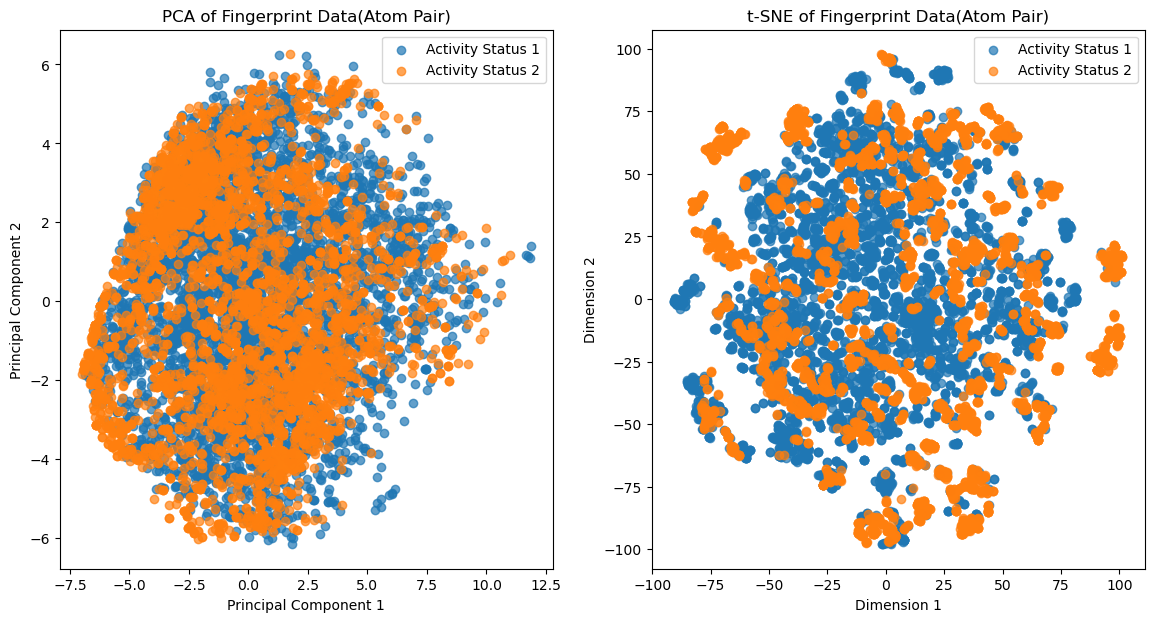

In [360]:
# Plot PCA
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
for status in [1, 2]:
    subset = df_pca[df_pca['Activity Status'] == status]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Activity Status {status}', alpha=0.7)
plt.title('PCA of Fingerprint Data(Atom Pair)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
for status in [1, 2]:
    subset = df_tsne[df_tsne['Activity Status'] == status]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=f'Activity Status {status}', alpha=0.7)
plt.title('t-SNE of Fingerprint Data(Atom Pair)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

plt.show()

In [252]:
!pip install shap

In [254]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

AP = pd.read_csv("df_nM_AP.csv")
AP.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                              Smiles Standard Type  \
0  CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...          IC50   
1  CCn1c(=O)/c(=C/C=C2\Sc3ccc(F)cc3N2C)s/c1=C\c1s...          IC50   
2  C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...          IC50   
3            Clc1ccc(/C=N/Nc2ncnc3sc4c(c23)CCCC4)cc1          IC50   
4                  COc1cc(O)cc(O)c1C(=O)/C=C/c1ccco1          IC50   

   Standard Value  Activity  AtomPair_0  AtomPair_1  AtomPair_2  AtomPair_3  \
0            40.0       2.0           0           0           0           0   
1            81.0       2.0           0           0           0           0   
2           108.0       2.0           1           1           1           0   
3         30000.0       1.0           1           1           0           0   
4         34200.0       1.0           0           0           0           0   

   ...  AtomPair_2038  AtomPair_2039  AtomPair_2040  AtomPair_2041  \
0  ...              0              0              0              0   
1  ...              0              0              0              0   
2  ...              0              0              1              1   
3  ...              0              0              0              0   
4  ...              0              0              0              0   

   AtomPair_2042  AtomPair_2043  AtomPair_2044  AtomPair_2045  AtomPair_2046  \
0              0              0              1              0              0   
1              0              0              1              0              0   
2              1              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   AtomPair_2047  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 2054 columns]

In [14]:
df_nM_RD = pd.read_csv("df_nM_RD.csv")
df_nM_MCS = pd.read_csv("df_nM_MCS.csv")
df_nM_MG = pd.read_csv("df_nM_MG.csv")

In [15]:
X1 = df_nM_RD.drop(columns=['Smiles','Standard Type','Activity','Standard Value','Unnamed: 0','Unnamed: 0.1'], axis=1)
X1

RDKit_0  RDKit_1  RDKit_2  RDKit_3  RDKit_4  RDKit_5  RDKit_6  RDKit_7  \
0           1        1        1        1        0        1        0        0   
1           1        1        1        1        1        1        0        0   
2           1        0        1        0        0        1        0        0   
3           1        1        1        1        1        1        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6882        1        0        1        1        1        1        1        0   
6883        1        1        0        0        1        1        0        0   
6884        1        1        1        1        1        1        1        0   
6885        0        1        0        1        0        1        1        1   
6886        0        0        0        0        0        0        0        0   

      RDKit_8  RDKit_9  ...  RDKit_2038  RDKit_2039  RDKit_2040  RDKit_2041  \
0           1        0  ...           1           1           1           1   
1           1        0  ...           1           1           1           1   
2           0        0  ...           1           0           1           0   
3           1        1  ...           0           1           1           1   
4           0        0  ...           0           0           0           0   
...       ...      ...  ...         ...         ...         ...         ...   
6882        0        0  ...           0           1           1           1   
6883        1        0  ...           1           0           0           1   
6884        0        1  ...           0           1           1           1   
6885        1        0  ...           1           0           0           1   
6886        0        0  ...           0           0           0           0   

      RDKit_2042  RDKit_2043  RDKit_2044  RDKit_2045  RDKit_2046  RDKit_2047  
0              1           1           0           0           1           1  
1              1           1           0           0           1           1  
2              0           1           0           0           0           1  
3              0           0           0           0           0           1  
4              0           0           0           0           1           1  
...          ...         ...         ...         ...         ...         ...  
6882           0           0           0           0           1           0  
6883           0           1           0           1           0           0  
6884           1           0           0           0           1           1  
6885           0           0           0           1           0           1  
6886           0           0           0           0           1           1  

[6887 rows x 2048 columns]

In [423]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X1 = selection.fit_transform(X1)

In [16]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X1_resampled, Y_resampled = smote.fit_resample(X1_train, Y_train)


In [40]:
lr = LogisticRegression(solver='saga',max_iter=3000,random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(probability=True)
dt = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
nb = GaussianNB()
mlp = MLPClassifier(random_state=42)

In [457]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model1.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep1 = classification_report(Y_test, y_pred)
print(rep1)


0.9078374455732946
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95      1165
         2.0       0.73      0.64      0.68       213

    accuracy                           0.91      1378
   macro avg       0.83      0.80      0.81      1378
weighted avg       0.90      0.91      0.91      1378



In [458]:
feature_names = X1_resampled.columns

In [459]:
importances1 = model1.feature_importances_

In [466]:
print(f"Number of features: {len(feature_names)}")
print(f"Number of importances: {len(importances1)}")

Number of features: 2048
Number of importances: 2048


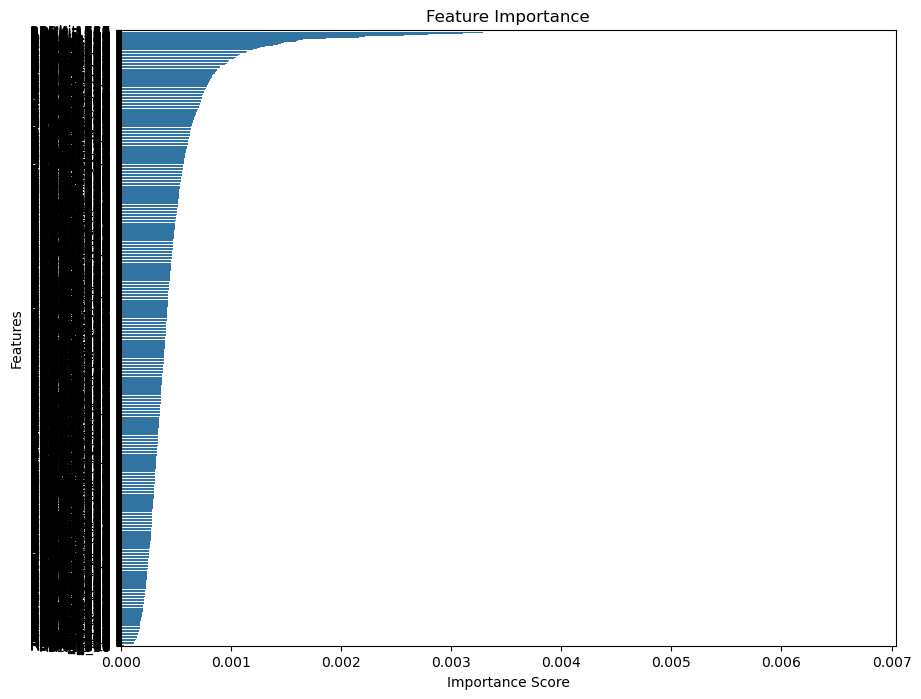

In [461]:
# Ensure feature names match the features used for training
feature_names = X1_resampled.columns if isinstance(X_train, pd.DataFrame) else feature_names

# Check lengths
if len(feature_names) == len(importances):
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances1
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("Mismatch in the number of features and importances. Please check your data.")

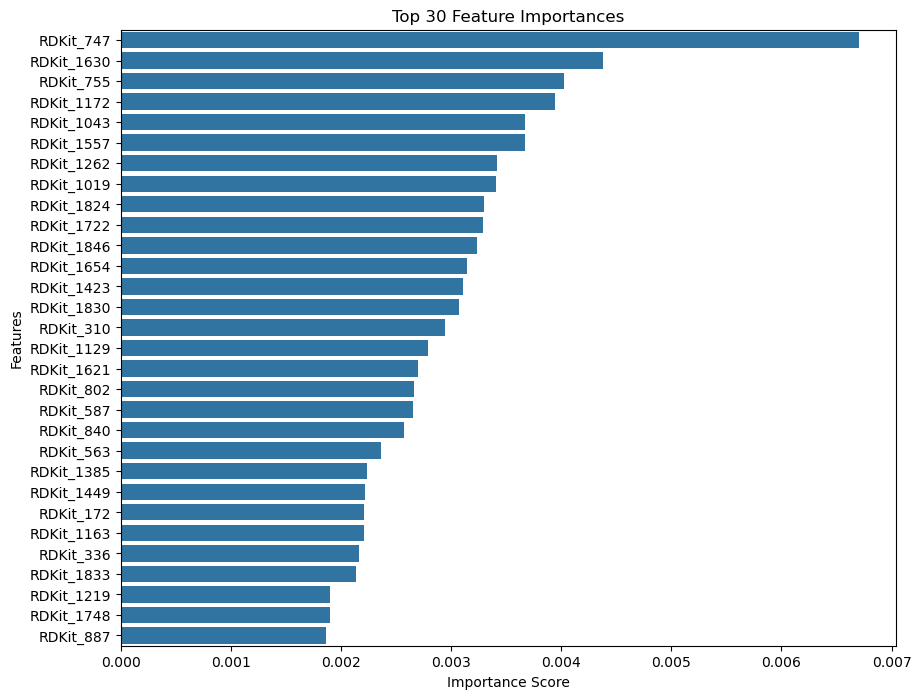

In [462]:
top_30_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(30)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_30_features)
plt.title('Top 30 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [428]:
from sklearn.ensemble import RandomForestClassifier

model2 = LogisticRegression(solver='saga',max_iter=3000,random_state=42)
model2.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model2.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep2 = classification_report(Y_test, y_pred,output_dict=True)
print(rep2)


0.8730043541364296
{'1.0': {'precision': 0.9357394366197183, 'recall': 0.9124463519313305, 'f1-score': 0.9239461103867883, 'support': 1165.0}, '2.0': {'precision': 0.5785123966942148, 'recall': 0.6572769953051644, 'f1-score': 0.6153846153846154, 'support': 213.0}, 'accuracy': 0.8730043541364296, 'macro avg': {'precision': 0.7571259166569666, 'recall': 0.7848616736182474, 'f1-score': 0.7696653628857019, 'support': 1378.0}, 'weighted avg': {'precision': 0.8805221945993029, 'recall': 0.8730043541364296, 'f1-score': 0.8762511913479909, 'support': 1378.0}}


In [463]:
from sklearn.ensemble import RandomForestClassifier

model3 = GradientBoostingClassifier(random_state=42)
model3.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model3.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep3 = classification_report(Y_test, y_pred)
print(rep3)


0.8679245283018868
              precision    recall  f1-score   support

         1.0       0.94      0.90      0.92      1165
         2.0       0.56      0.69      0.62       213

    accuracy                           0.87      1378
   macro avg       0.75      0.80      0.77      1378
weighted avg       0.88      0.87      0.87      1378



In [464]:
feature_names = X1_resampled.columns

In [465]:
importances3 = model3.feature_importances_

In [467]:
print(f"Number of features: {len(feature_names)}")
print(f"Number of importances: {len(importances3)}")

Number of features: 2048
Number of importances: 2048


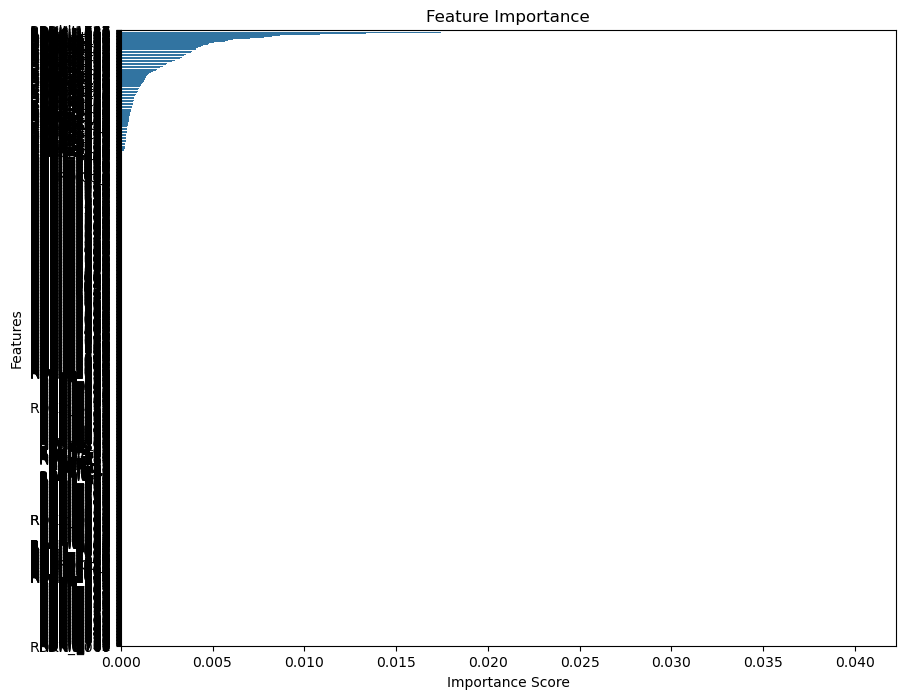

In [469]:
# Ensure feature names match the features used for training
feature_names = X1_resampled.columns if isinstance(X_train, pd.DataFrame) else feature_names

# Check lengths
if len(feature_names) == len(importances):
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances3
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("Mismatch in the number of features and importances. Please check your data.")

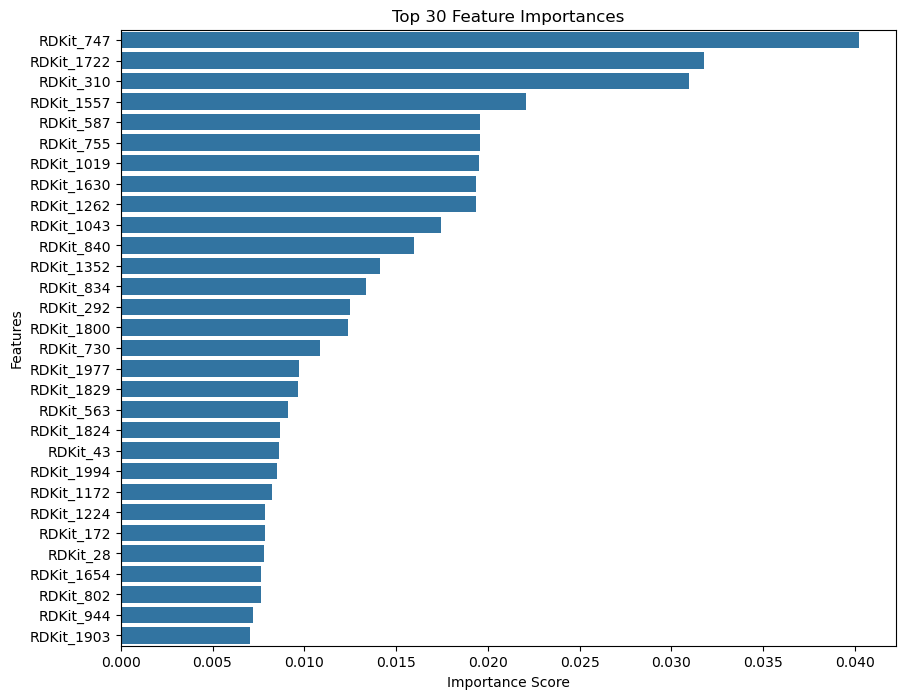

In [470]:
top_30_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(30)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_30_features)
plt.title('Top 30 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [430]:
from sklearn.ensemble import RandomForestClassifier

model4 = KNeighborsClassifier()
model4.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model4.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep4 = classification_report(Y_test, y_pred,output_dict=True)
print(rep4)


0.8214804063860668
{'1.0': {'precision': 0.963673057517659, 'recall': 0.8197424892703863, 'f1-score': 0.885899814471243, 'support': 1165.0}, '2.0': {'precision': 0.4573643410852713, 'recall': 0.8309859154929577, 'f1-score': 0.59, 'support': 213.0}, 'accuracy': 0.8214804063860668, 'macro avg': {'precision': 0.7105186993014652, 'recall': 0.8253642023816721, 'f1-score': 0.7379499072356215, 'support': 1378.0}, 'weighted avg': {'precision': 0.885411985964612, 'recall': 0.8214804063860668, 'f1-score': 0.8401620347307679, 'support': 1378.0}}


In [431]:
from sklearn.ensemble import RandomForestClassifier

model5 = SVC()
model5.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model5.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep5 = classification_report(Y_test, y_pred,output_dict=True)
print(rep5)


0.895500725689405
{'1.0': {'precision': 0.9404659188955996, 'recall': 0.9356223175965666, 'f1-score': 0.9380378657487092, 'support': 1165.0}, '2.0': {'precision': 0.6575342465753424, 'recall': 0.676056338028169, 'f1-score': 0.6666666666666666, 'support': 213.0}, 'accuracy': 0.895500725689405, 'macro avg': {'precision': 0.7990000827354711, 'recall': 0.8058393278123678, 'f1-score': 0.8023522662076878, 'support': 1378.0}, 'weighted avg': {'precision': 0.8967326487909446, 'recall': 0.895500725689405, 'f1-score': 0.8960915193013398, 'support': 1378.0}}


In [432]:
from sklearn.ensemble import RandomForestClassifier

model6 = DecisionTreeClassifier(random_state=42)
model6.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model6.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep6 = classification_report(Y_test, y_pred,output_dict=True)
print(rep6)


0.8214804063860668
{'1.0': {'precision': 0.9258572752548656, 'recall': 0.8575107296137339, 'f1-score': 0.8903743315508021, 'support': 1165.0}, '2.0': {'precision': 0.44481605351170567, 'recall': 0.6244131455399061, 'f1-score': 0.51953125, 'support': 213.0}, 'accuracy': 0.8214804063860668, 'macro avg': {'precision': 0.6853366643832857, 'recall': 0.7409619375768199, 'f1-score': 0.7049527907754011, 'support': 1378.0}, 'weighted avg': {'precision': 0.8515018469302698, 'recall': 0.8214804063860668, 'f1-score': 0.8330524328785809, 'support': 1378.0}}


In [433]:
from sklearn.ensemble import RandomForestClassifier

model7 = AdaBoostClassifier(random_state=42)
model7.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model7.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep7 = classification_report(Y_test, y_pred,output_dict=True)
print(rep7)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7815674891146589
{'1.0': {'precision': 0.9210526315789473, 'recall': 0.8111587982832618, 'f1-score': 0.8626198083067093, 'support': 1165.0}, '2.0': {'precision': 0.375, 'recall': 0.6197183098591549, 'f1-score': 0.4672566371681416, 'support': 213.0}, 'accuracy': 0.7815674891146589, 'macro avg': {'precision': 0.6480263157894737, 'recall': 0.7154385540712083, 'f1-score': 0.6649382227374254, 'support': 1378.0}, 'weighted avg': {'precision': 0.836648269803682, 'recall': 0.7815674891146589, 'f1-score': 0.8015077941902253, 'support': 1378.0}}


In [434]:
from sklearn.ensemble import RandomForestClassifier

model8 = GaussianNB()
model8.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model8.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep6 = classification_report(Y_test, y_pred,output_dict=True)
print(rep6)


0.6161103047895501
{'1.0': {'precision': 0.8741176470588236, 'recall': 0.6377682403433477, 'f1-score': 0.7374689826302729, 'support': 1165.0}, '2.0': {'precision': 0.20075757575757575, 'recall': 0.49765258215962443, 'f1-score': 0.28609986504723345, 'support': 213.0}, 'accuracy': 0.6161103047895501, 'macro avg': {'precision': 0.5374376114081997, 'recall': 0.567710411251486, 'f1-score': 0.5117844238387532, 'support': 1378.0}, 'weighted avg': {'precision': 0.7700351396661053, 'recall': 0.6161103047895501, 'f1-score': 0.6677000261388453, 'support': 1378.0}}


In [435]:
from sklearn.ensemble import RandomForestClassifier

model9 = MLPClassifier(random_state=42)
model9.fit(X1_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model9.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep9 = classification_report(Y_test, y_pred,output_dict=True)
print(rep9)


0.8940493468795355
{'1.0': {'precision': 0.9465381244522348, 'recall': 0.927038626609442, 'f1-score': 0.9366869037294016, 'support': 1165.0}, '2.0': {'precision': 0.6413502109704642, 'recall': 0.7136150234741784, 'f1-score': 0.6755555555555556, 'support': 213.0}, 'accuracy': 0.8940493468795355, 'macro avg': {'precision': 0.7939441677113495, 'recall': 0.8203268250418102, 'f1-score': 0.8061212296424786, 'support': 1378.0}, 'weighted avg': {'precision': 0.8993646661274038, 'recall': 0.8940493468795355, 'f1-score': 0.8963233499115285, 'support': 1378.0}}


In [436]:
from sklearn.ensemble import RandomForestClassifier

model = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('gb', gb), ('knn', knn), ('svc', svc), ('dt', dt),('ada', ada), ('nb', nb), ('mlp', mlp)],
    voting='soft'
)
model.fit(X1_resampled, Y_resampled )

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=3000, random_state=42,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('nb', GaussianNB()),
                             ('mlp', MLPClassifier(random_state=42))],
                 voting='soft')

In [443]:
y_pred = model.predict(X1_test)
print(accuracy_score(Y_test, y_pred))
rep0 = classification_report(Y_test, y_pred,output_dict=True)
print(rep0)

0.8991291727140783
{'1.0': {'precision': 0.9453125, 'recall': 0.934763948497854, 'f1-score': 0.9400086318515322, 'support': 1165.0}, '2.0': {'precision': 0.6637168141592921, 'recall': 0.704225352112676, 'f1-score': 0.683371298405467, 'support': 213.0}, 'accuracy': 0.8991291727140783, 'macro avg': {'precision': 0.804514657079646, 'recall': 0.819494650305265, 'f1-score': 0.8116899651284996, 'support': 1378.0}, 'weighted avg': {'precision': 0.9017857357880473, 'recall': 0.8991291727140783, 'f1-score': 0.9003397261737297, 'support': 1378.0}}


In [444]:
from sklearn.metrics import classification_report
reports = [rep1,rep2,rep3,rep4,rep5,rep6,rep7,rep8,rep9,rep0]
def extract_metrics(report):
    metrics = {
        'accuracy': report['accuracy'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1': report['macro avg']['f1-score']
    }
    return metrics

metrics_list = [extract_metrics(report) for report in reports]


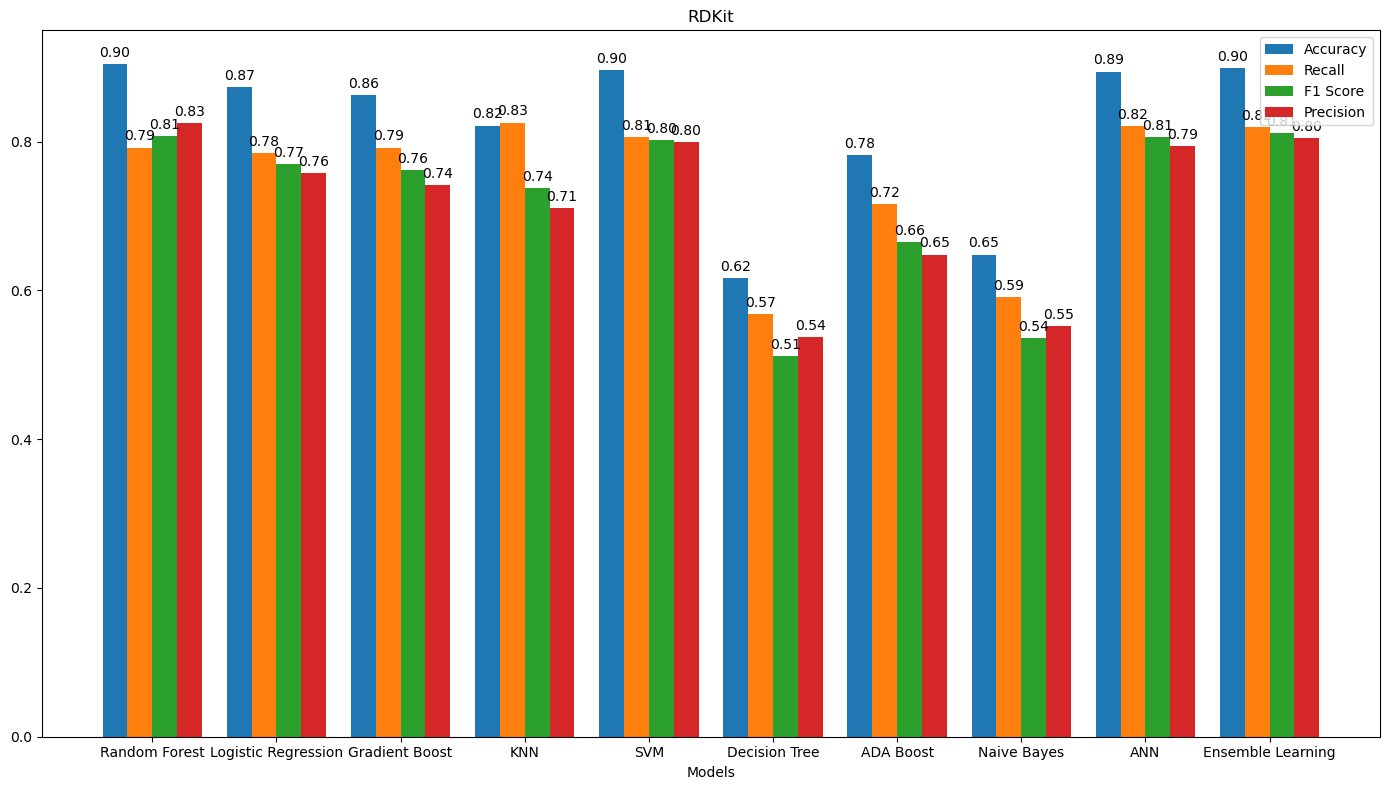

In [445]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Logistic Regression', 'Gradient Boost', 'KNN', 'SVM', 'Decision Tree', 'ADA Boost', 'Naive Bayes', 'ANN', 'Ensemble Learning']

# Metrics
accuracies = [metrics['accuracy'] for metrics in metrics_list]
recalls = [metrics['recall'] for metrics in metrics_list]
f1_scores = [metrics['f1'] for metrics in metrics_list]
precisions = [metrics['precision'] for metrics in metrics_list]

x = np.arange(len(models))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, recalls, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_scores, width, label='F1 Score')
rects4 = ax.bar(x + 1.5*width, precisions, width, label='Precision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('RDKit')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.
def add_labels(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

plt.show()


In [446]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X1_resampled)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X1_resampled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Activity Status'] = Y_resampled

# Create a DataFrame for the t-SNE results
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Activity Status'] = Y_resampled



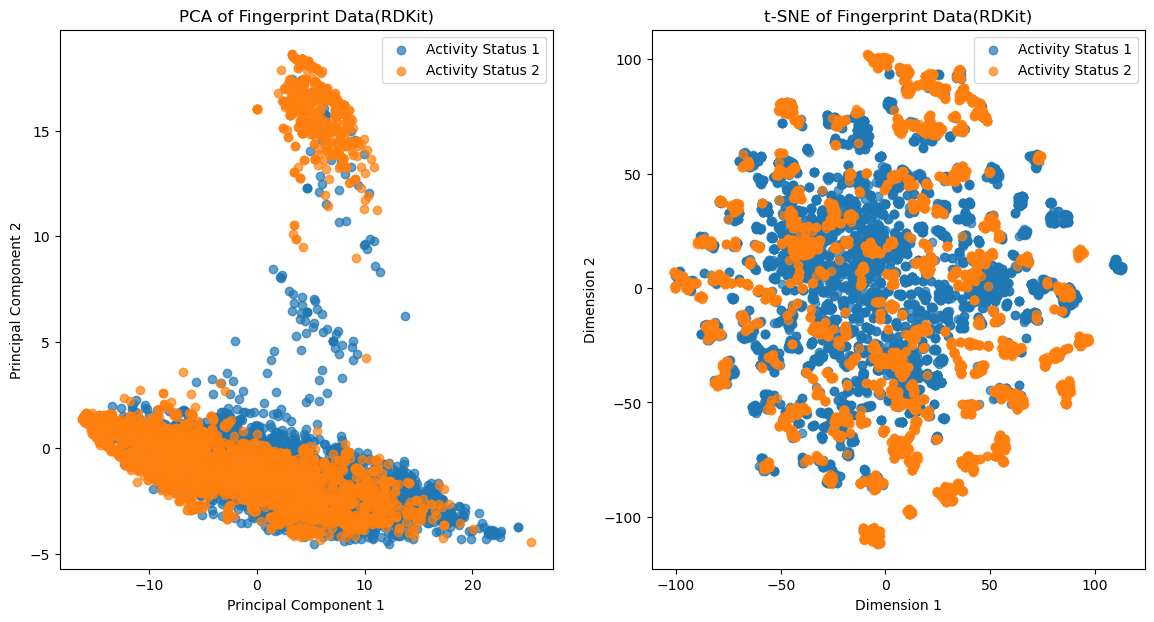

In [448]:
# Plot PCA
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
for status in [1, 2]:
    subset = df_pca[df_pca['Activity Status'] == status]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Activity Status {status}', alpha=0.7)
plt.title('PCA of Fingerprint Data(RDKit)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
for status in [1, 2]:
    subset = df_tsne[df_tsne['Activity Status'] == status]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=f'Activity Status {status}', alpha=0.7)
plt.title('t-SNE of Fingerprint Data(RDKit)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

plt.show()

In [18]:
X2 = df_nM_MCS.drop(columns=['Smiles','Standard Type','Activity','Standard Value','Unnamed: 0','Unnamed: 0.1'], axis=1)
X2

MACCS_0  MACCS_1  MACCS_2  MACCS_3  MACCS_4  MACCS_5  MACCS_6  MACCS_7  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6882        0        0        0        0        0        0        0        0   
6883        0        0        0        0        0        0        0        0   
6884        0        0        0        0        0        0        0        0   
6885        0        0        0        0        0        0        0        0   
6886        0        0        0        0        0        0        0        0   

      MACCS_8  MACCS_9  ...  MACCS_157  MACCS_158  MACCS_159  MACCS_160  \
0           0        0  ...          0          1          0          1   
1           0        0  ...          0          1          0          1   
2           0        0  ...          1          1          1          1   
3           0        0  ...          0          1          0          0   
4           0        0  ...          1          0          1          1   
...       ...      ...  ...        ...        ...        ...        ...   
6882        0        0  ...          1          1          0          1   
6883        0        0  ...          1          0          1          0   
6884        0        0  ...          1          1          1          1   
6885        0        0  ...          1          0          1          1   
6886        0        0  ...          0          1          0          0   

      MACCS_161  MACCS_162  MACCS_163  MACCS_164  MACCS_165  MACCS_166  
0             1          1          1          1          1          1  
1             1          1          1          1          1          1  
2             1          0          1          1          1          0  
3             1          1          1          0          1          0  
4             0          1          1          1          1          0  
...         ...        ...        ...        ...        ...        ...  
6882          1          1          1          1          1          0  
6883          0          1          1          1          1          0  
6884          1          1          1          1          1          0  
6885          0          1          1          1          1          0  
6886          1          1          1          0          1          1  

[6887 rows x 167 columns]

In [472]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X2 = selection.fit_transform(X2)

In [19]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X2_resampled, Y_resampled = smote.fit_resample(X2_train, Y_train)


In [475]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model1.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep1 = classification_report(Y_test, y_pred,output_dict=True)
print(rep1)


0.9049346879535559
{'1.0': {'precision': 0.9366554054054054, 'recall': 0.951931330472103, 'f1-score': 0.9442315879097488, 'support': 1165.0}, '2.0': {'precision': 0.711340206185567, 'recall': 0.647887323943662, 'f1-score': 0.6781326781326781, 'support': 213.0}, 'accuracy': 0.9049346879535559, 'macro avg': {'precision': 0.8239978057954862, 'recall': 0.7999093272078825, 'f1-score': 0.8111821330212134, 'support': 1378.0}, 'weighted avg': {'precision': 0.9018280197495088, 'recall': 0.9049346879535559, 'f1-score': 0.9031001889384019, 'support': 1378.0}}


In [476]:
from sklearn.ensemble import RandomForestClassifier

model2 = LogisticRegression(solver='saga',max_iter=3000,random_state=42)
model2.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model2.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep2 = classification_report(Y_test, y_pred,output_dict=True)
print(rep2)


0.7133526850507983
{'1.0': {'precision': 0.9157667386609071, 'recall': 0.7278969957081545, 'f1-score': 0.8110951697752271, 'support': 1165.0}, '2.0': {'precision': 0.29867256637168144, 'recall': 0.6338028169014085, 'f1-score': 0.40601503759398494, 'support': 213.0}, 'accuracy': 0.7133526850507983, 'macro avg': {'precision': 0.6072196525162943, 'recall': 0.6808499063047815, 'f1-score': 0.608555103684606, 'support': 1378.0}, 'weighted avg': {'precision': 0.8203813549906567, 'recall': 0.7133526850507983, 'f1-score': 0.7484811870795779, 'support': 1378.0}}


In [477]:
from sklearn.ensemble import RandomForestClassifier

model3 = GradientBoostingClassifier(random_state=42)
model3.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model3.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep3 = classification_report(Y_test, y_pred,output_dict=True)
print(rep3)


0.7939042089985486
{'1.0': {'precision': 0.9247830279652844, 'recall': 0.8231759656652361, 'f1-score': 0.8710263396911898, 'support': 1165.0}, '2.0': {'precision': 0.39589442815249265, 'recall': 0.6338028169014085, 'f1-score': 0.48736462093862815, 'support': 213.0}, 'accuracy': 0.7939042089985486, 'macro avg': {'precision': 0.6603387280588886, 'recall': 0.7284893912833224, 'f1-score': 0.679195480314909, 'support': 1378.0}, 'weighted avg': {'precision': 0.8430317422177339, 'recall': 0.7939042089985486, 'f1-score': 0.8117230406387256, 'support': 1378.0}}


In [478]:
from sklearn.ensemble import RandomForestClassifier

model4 = KNeighborsClassifier()
model4.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model4.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep4 = classification_report(Y_test, y_pred,output_dict=True)
print(rep4)


0.8403483309143687
{'1.0': {'precision': 0.957405614714424, 'recall': 0.8489270386266095, 'f1-score': 0.899909008189263, 'support': 1165.0}, '2.0': {'precision': 0.48985507246376814, 'recall': 0.7934272300469484, 'f1-score': 0.6057347670250897, 'support': 213.0}, 'accuracy': 0.8403483309143687, 'macro avg': {'precision': 0.7236303435890961, 'recall': 0.8211771343367789, 'f1-score': 0.7528218876071764, 'support': 1378.0}, 'weighted avg': {'precision': 0.8851354655856942, 'recall': 0.8403483309143687, 'f1-score': 0.8544379534955264, 'support': 1378.0}}


In [479]:
from sklearn.ensemble import RandomForestClassifier

model5 = SVC()
model5.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model5.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep5 = classification_report(Y_test, y_pred,output_dict=True)
print(rep5)


0.8795355587808418
{'1.0': {'precision': 0.9400881057268723, 'recall': 0.9158798283261803, 'f1-score': 0.9278260869565217, 'support': 1165.0}, '2.0': {'precision': 0.5967078189300411, 'recall': 0.6807511737089202, 'f1-score': 0.6359649122807017, 'support': 213.0}, 'accuracy': 0.8795355587808418, 'macro avg': {'precision': 0.7683979623284567, 'recall': 0.7983155010175502, 'f1-score': 0.7818954996186117, 'support': 1378.0}, 'weighted avg': {'precision': 0.8870111818605987, 'recall': 0.8795355587808418, 'f1-score': 0.8827125672134524, 'support': 1378.0}}


In [480]:
from sklearn.ensemble import RandomForestClassifier

model6 = DecisionTreeClassifier(random_state=42)
model6.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model6.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep6 = classification_report(Y_test, y_pred,output_dict=True)
print(rep6)


0.8613933236574746
{'1.0': {'precision': 0.9443430656934306, 'recall': 0.8884120171673819, 'f1-score': 0.9155241043785936, 'support': 1165.0}, '2.0': {'precision': 0.5390070921985816, 'recall': 0.7136150234741784, 'f1-score': 0.6141414141414141, 'support': 213.0}, 'accuracy': 0.8613933236574746, 'macro avg': {'precision': 0.741675078946006, 'recall': 0.8010135203207802, 'f1-score': 0.7648327592600038, 'support': 1378.0}, 'weighted avg': {'precision': 0.8816895371343574, 'recall': 0.8613933236574746, 'f1-score': 0.8689388264246608, 'support': 1378.0}}


In [481]:
from sklearn.ensemble import RandomForestClassifier

model7 = AdaBoostClassifier(random_state=42)
model7.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model7.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep7 = classification_report(Y_test, y_pred,output_dict=True)
print(rep7)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6959361393323658
{'1.0': {'precision': 0.9072052401746725, 'recall': 0.7133047210300429, 'f1-score': 0.798654493032196, 'support': 1165.0}, '2.0': {'precision': 0.27705627705627706, 'recall': 0.6009389671361502, 'f1-score': 0.37925925925925924, 'support': 213.0}, 'accuracy': 0.6959361393323658, 'macro avg': {'precision': 0.5921307586154748, 'recall': 0.6571218440830966, 'f1-score': 0.5889568761457277, 'support': 1378.0}, 'weighted avg': {'precision': 0.8098019534226999, 'recall': 0.6959361393323658, 'f1-score': 0.7338277986971921, 'support': 1378.0}}


In [482]:
from sklearn.ensemble import RandomForestClassifier

model8 = GaussianNB()
model8.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model8.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep8 = classification_report(Y_test, y_pred,output_dict=True)
print(rep8)


0.6052249637155298
{'1.0': {'precision': 0.9037711313394018, 'recall': 0.5965665236051502, 'f1-score': 0.718717683557394, 'support': 1165.0}, '2.0': {'precision': 0.22824302134646962, 'recall': 0.6525821596244131, 'f1-score': 0.3381995133819951, 'support': 213.0}, 'accuracy': 0.6052249637155298, 'macro avg': {'precision': 0.5660070763429357, 'recall': 0.6245743416147816, 'f1-score': 0.5284585984696946, 'support': 1378.0}, 'weighted avg': {'precision': 0.7993535062098701, 'recall': 0.6052249637155298, 'f1-score': 0.6599002886028511, 'support': 1378.0}}


In [483]:
from sklearn.ensemble import RandomForestClassifier

model9 = MLPClassifier(random_state=42)
model9.fit(X2_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model9.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep9 = classification_report(Y_test, y_pred,output_dict=True)
print(rep9)


0.8838896952104499
{'1.0': {'precision': 0.9474621549421193, 'recall': 0.9133047210300429, 'f1-score': 0.9300699300699301, 'support': 1165.0}, '2.0': {'precision': 0.6039215686274509, 'recall': 0.7230046948356808, 'f1-score': 0.6581196581196581, 'support': 213.0}, 'accuracy': 0.8838896952104499, 'macro avg': {'precision': 0.7756918617847851, 'recall': 0.8181547079328618, 'f1-score': 0.7940947940947941, 'support': 1378.0}, 'weighted avg': {'precision': 0.8943604532839015, 'recall': 0.8838896952104499, 'f1-score': 0.8880340752619417, 'support': 1378.0}}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [484]:
from sklearn.ensemble import RandomForestClassifier

model = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('gb', gb), ('knn', knn), ('svc', svc), ('dt', dt),('ada', ada), ('nb', nb), ('mlp', mlp)],
    voting='soft'
)
model.fit(X2_resampled, Y_resampled )

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=3000, random_state=42,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('nb', GaussianNB()),
                             ('mlp', MLPClassifier(random_state=42))],
                 voting='soft')

In [487]:
y_pred = model.predict(X2_test)
print(accuracy_score(Y_test, y_pred))
rep0 = classification_report(Y_test, y_pred,output_dict=True)
print(rep0)

0.8867924528301887
{'1.0': {'precision': 0.9476486246672582, 'recall': 0.9167381974248927, 'f1-score': 0.9319371727748691, 'support': 1165.0}, '2.0': {'precision': 0.6135458167330677, 'recall': 0.7230046948356808, 'f1-score': 0.6637931034482759, 'support': 213.0}, 'accuracy': 0.8867924528301887, 'macro avg': {'precision': 0.780597220700163, 'recall': 0.8198714461302867, 'f1-score': 0.7978651381115724, 'support': 1378.0}, 'weighted avg': {'precision': 0.896005737809506, 'recall': 0.8867924528301887, 'f1-score': 0.8904896497222099, 'support': 1378.0}}


In [488]:
from sklearn.metrics import classification_report
reports = [rep1,rep2,rep3,rep4,rep5,rep6,rep7,rep8,rep9,rep0]
def extract_metrics(report):
    metrics = {
        'accuracy': report['accuracy'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1': report['macro avg']['f1-score']
    }
    return metrics

metrics_list = [extract_metrics(report) for report in reports]


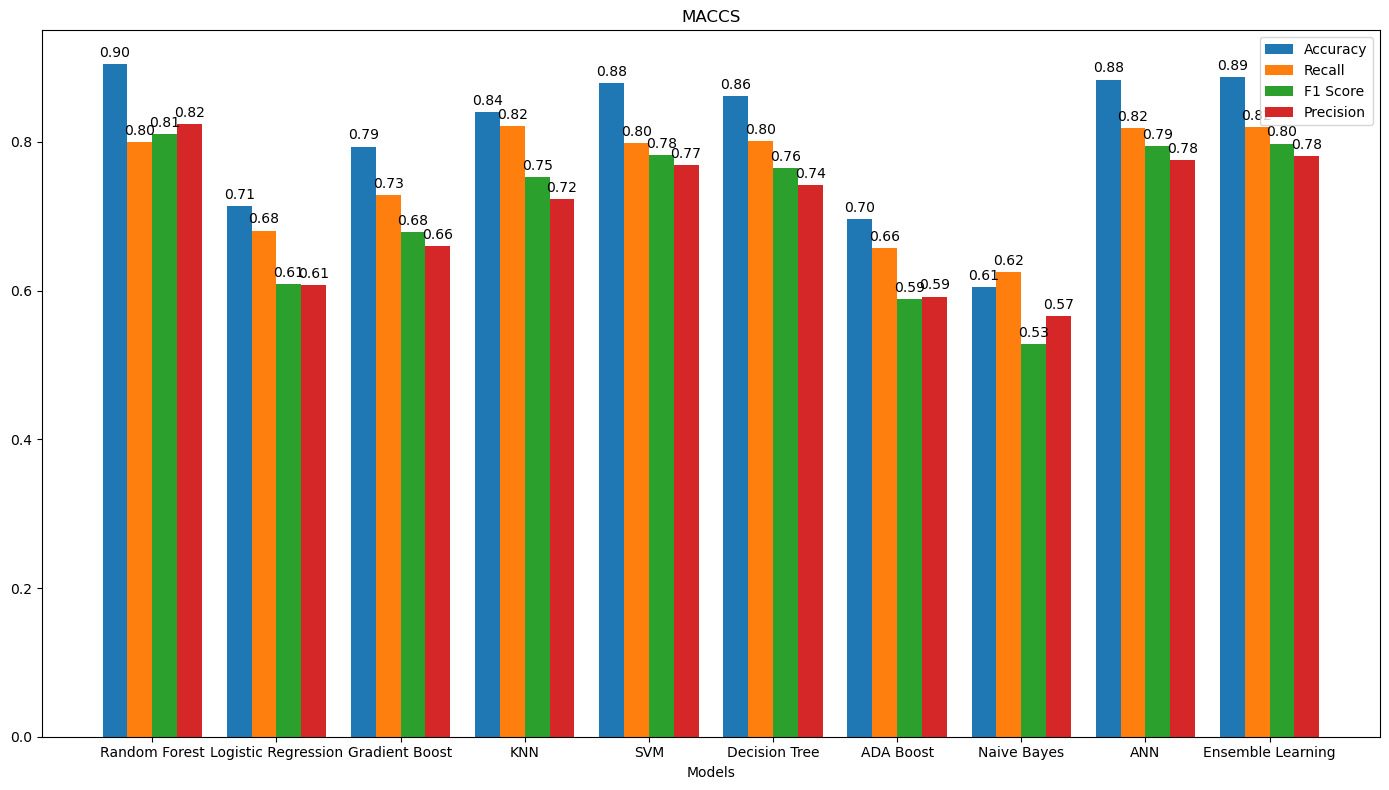

In [489]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Logistic Regression', 'Gradient Boost', 'KNN', 'SVM', 'Decision Tree', 'ADA Boost', 'Naive Bayes', 'ANN', 'Ensemble Learning']

# Metrics
accuracies = [metrics['accuracy'] for metrics in metrics_list]
recalls = [metrics['recall'] for metrics in metrics_list]
f1_scores = [metrics['f1'] for metrics in metrics_list]
precisions = [metrics['precision'] for metrics in metrics_list]

x = np.arange(len(models))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, recalls, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_scores, width, label='F1 Score')
rects4 = ax.bar(x + 1.5*width, precisions, width, label='Precision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('MACCS')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.
def add_labels(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

plt.show()

In [491]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X2_resampled)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X2_resampled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Activity Status'] = Y_resampled

# Create a DataFrame for the t-SNE results
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Activity Status'] = Y_resampled

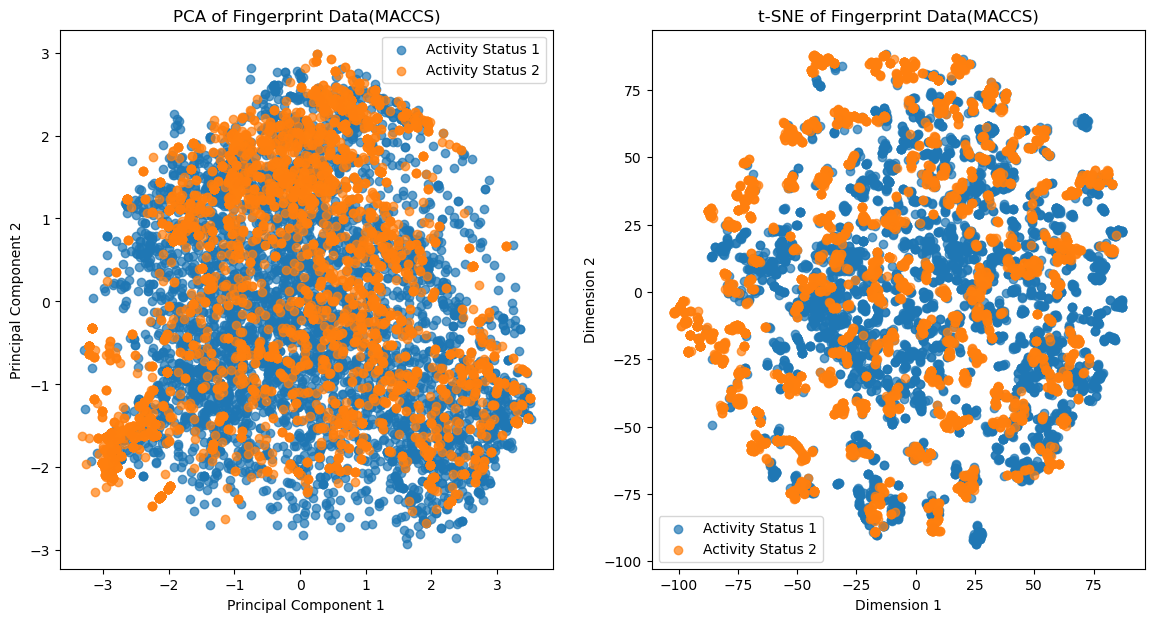

In [493]:
# Plot PCA
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
for status in [1, 2]:
    subset = df_pca[df_pca['Activity Status'] == status]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Activity Status {status}', alpha=0.7)
plt.title('PCA of Fingerprint Data(MACCS)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
for status in [1, 2]:
    subset = df_tsne[df_tsne['Activity Status'] == status]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=f'Activity Status {status}', alpha=0.7)
plt.title('t-SNE of Fingerprint Data(MACCS)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

plt.show()

In [21]:
X3 = df_nM_MG.drop(columns=['Smiles','Standard Type','Activity','Standard Value','Unnamed: 0','Unnamed: 0.1'], axis=1)
X3

Morgan_0  Morgan_1  Morgan_2  Morgan_3  Morgan_4  Morgan_5  Morgan_6  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         1         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
6882         0         0         1         0         0         0         0   
6883         0         0         0         0         0         0         0   
6884         0         0         0         0         0         0         0   
6885         0         1         0         0         0         0         0   
6886         0         0         0         0         0         0         0   

      Morgan_7  Morgan_8  Morgan_9  ...  Morgan_2038  Morgan_2039  \
0            0         1         0  ...            0            0   
1            0         1         0  ...            0            0   
2            0         0         0  ...            0            0   
3            0         0         0  ...            0            0   
4            0         0         0  ...            0            0   
...        ...       ...       ...  ...          ...          ...   
6882         0         0         0  ...            0            0   
6883         0         0         0  ...            0            0   
6884         0         0         0  ...            0            0   
6885         0         0         0  ...            0            0   
6886         0         0         0  ...            0            0   

      Morgan_2040  Morgan_2041  Morgan_2042  Morgan_2043  Morgan_2044  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
6882            0            0            0            0            0   
6883            0            0            0            0            0   
6884            0            0            0            0            0   
6885            0            0            0            0            0   
6886            0            0            0            0            0   

      Morgan_2045  Morgan_2046  Morgan_2047  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            0  
...           ...          ...          ...  
6882            0            0            0  
6883            0            0            0  
6884            0            0            0  
6885            0            0            0  
6886            0            0            0  

[6887 rows x 2048 columns]

In [27]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X3 = selection.fit_transform(X3)

In [22]:
X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.2, random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X3_resampled, Y_resampled = smote.fit_resample(X3_train, Y_train)


In [30]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model1.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep1 = classification_report(Y_test, y_pred,output_dict=True)
print(rep1)


0.8555878084179971
{'1.0': {'precision': 0.9351351351351351, 'recall': 0.8909871244635194, 'f1-score': 0.9125274725274726, 'support': 1165.0}, '2.0': {'precision': 0.5261194029850746, 'recall': 0.6619718309859155, 'f1-score': 0.5862785862785863, 'support': 213.0}, 'accuracy': 0.8555878084179971, 'macro avg': {'precision': 0.7306272690601049, 'recall': 0.7764794777247175, 'f1-score': 0.7494030294030294, 'support': 1378.0}, 'weighted avg': {'precision': 0.8719128194980069, 'recall': 0.8555878084179971, 'f1-score': 0.8620985808213675, 'support': 1378.0}}


In [31]:
from sklearn.ensemble import RandomForestClassifier

model2 = LogisticRegression(solver='saga',max_iter=3000,random_state=42)
model2.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model2.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep2 = classification_report(Y_test, y_pred,output_dict=True)
print(rep2)


0.6320754716981132
{'1.0': {'precision': 0.8916666666666667, 'recall': 0.6429184549356223, 'f1-score': 0.7471321695760599, 'support': 1165.0}, '2.0': {'precision': 0.22676579925650558, 'recall': 0.5727699530516432, 'f1-score': 0.3249001331557923, 'support': 213.0}, 'accuracy': 0.6320754716981132, 'macro avg': {'precision': 0.5592162329615862, 'recall': 0.6078442039936327, 'f1-score': 0.5360161513659261, 'support': 1378.0}, 'weighted avg': {'precision': 0.7888917140118304, 'recall': 0.6320754716981132, 'f1-score': 0.6818669854269185, 'support': 1378.0}}


In [32]:
from sklearn.ensemble import RandomForestClassifier

model3 = GradientBoostingClassifier(random_state=42)
model3.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model3.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep3 = classification_report(Y_test, y_pred,output_dict=True)
print(rep3)


0.7460087082728593
{'1.0': {'precision': 0.9240374609781478, 'recall': 0.7622317596566524, 'f1-score': 0.8353715898400753, 'support': 1165.0}, '2.0': {'precision': 0.33573141486810554, 'recall': 0.6572769953051644, 'f1-score': 0.4444444444444444, 'support': 213.0}, 'accuracy': 0.7460087082728593, 'macro avg': {'precision': 0.6298844379231266, 'recall': 0.7097543774809083, 'f1-score': 0.6399080171422599, 'support': 1378.0}, 'weighted avg': {'precision': 0.8331019110351587, 'recall': 0.7460087082728593, 'f1-score': 0.7749452603993865, 'support': 1378.0}}


In [33]:
from sklearn.ensemble import RandomForestClassifier

model4 = KNeighborsClassifier()
model4.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model4.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep4 = classification_report(Y_test, y_pred,output_dict=True)
print(rep4)


0.7822931785195936
{'1.0': {'precision': 0.9463364293085655, 'recall': 0.7871244635193133, 'f1-score': 0.85941893158388, 'support': 1165.0}, '2.0': {'precision': 0.39364303178484106, 'recall': 0.755868544600939, 'f1-score': 0.5176848874598071, 'support': 213.0}, 'accuracy': 0.7822931785195936, 'macro avg': {'precision': 0.6699897305467033, 'recall': 0.7714965040601262, 'f1-score': 0.6885519095218435, 'support': 1378.0}, 'weighted avg': {'precision': 0.8609055921006169, 'recall': 0.7822931785195936, 'f1-score': 0.8065964704819732, 'support': 1378.0}}


In [34]:
from sklearn.ensemble import RandomForestClassifier

model5 = SVC()
model5.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model5.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep5 = classification_report(Y_test, y_pred,output_dict=True)
print(rep5)


0.8243831640058055
{'1.0': {'precision': 0.9293023255813954, 'recall': 0.8575107296137339, 'f1-score': 0.8919642857142858, 'support': 1165.0}, '2.0': {'precision': 0.4521452145214521, 'recall': 0.6431924882629108, 'f1-score': 0.5310077519379846, 'support': 213.0}, 'accuracy': 0.8243831640058055, 'macro avg': {'precision': 0.6907237700514237, 'recall': 0.7503516089383223, 'f1-score': 0.7114860188261352, 'support': 1378.0}, 'weighted avg': {'precision': 0.8555472714044955, 'recall': 0.8243831640058055, 'f1-score': 0.8361705689549591, 'support': 1378.0}}


In [35]:
from sklearn.ensemble import RandomForestClassifier

model6 = DecisionTreeClassifier(random_state=42)
model6.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model6.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep6 = classification_report(Y_test, y_pred,output_dict=True)
print(rep6)


0.8280116110304789
{'1.0': {'precision': 0.9360902255639098, 'recall': 0.8549356223175966, 'f1-score': 0.8936742934051144, 'support': 1165.0}, '2.0': {'precision': 0.46178343949044587, 'recall': 0.6807511737089202, 'f1-score': 0.5502846299810247, 'support': 213.0}, 'accuracy': 0.8280116110304789, 'macro avg': {'precision': 0.6989368325271779, 'recall': 0.7678433980132584, 'f1-score': 0.7219794616930695, 'support': 1378.0}, 'weighted avg': {'precision': 0.8627757513740347, 'recall': 0.8280116110304789, 'f1-score': 0.840595920176282, 'support': 1378.0}}


In [36]:
from sklearn.ensemble import RandomForestClassifier

model7 = AdaBoostClassifier(random_state=42)
model7.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model7.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep7 = classification_report(Y_test, y_pred,output_dict=True)
print(rep7)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6364296081277213
{'1.0': {'precision': 0.892434988179669, 'recall': 0.648068669527897, 'f1-score': 0.7508702138239681, 'support': 1165.0}, '2.0': {'precision': 0.22932330827067668, 'recall': 0.5727699530516432, 'f1-score': 0.3275167785234899, 'support': 213.0}, 'accuracy': 0.6364296081277213, 'macro avg': {'precision': 0.5608791482251728, 'recall': 0.6104193112897701, 'f1-score': 0.539193496173729, 'support': 1378.0}, 'weighted avg': {'precision': 0.7899365935348103, 'recall': 0.6364296081277213, 'f1-score': 0.6854316929828927, 'support': 1378.0}}


In [37]:
from sklearn.ensemble import RandomForestClassifier

model8 = GaussianNB()
model8.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model8.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep8 = classification_report(Y_test, y_pred,output_dict=True)
print(rep8)


0.5965166908563135
{'1.0': {'precision': 0.9011857707509882, 'recall': 0.5871244635193134, 'f1-score': 0.7110187110187111, 'support': 1165.0}, '2.0': {'precision': 0.22294022617124395, 'recall': 0.647887323943662, 'f1-score': 0.3317307692307692, 'support': 213.0}, 'accuracy': 0.5965166908563135, 'macro avg': {'precision': 0.5620629984611161, 'recall': 0.6175058937314877, 'f1-score': 0.5213747401247402, 'support': 1378.0}, 'weighted avg': {'precision': 0.7963481067484589, 'recall': 0.5965166908563135, 'f1-score': 0.6523914747336373, 'support': 1378.0}}


In [38]:
from sklearn.ensemble import RandomForestClassifier

model9 = MLPClassifier(random_state=42)
model9.fit(X3_resampled, Y_resampled )
from sklearn.metrics import accuracy_score, classification_report

y_pred = model9.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep9 = classification_report(Y_test, y_pred,output_dict=True)
print(rep9)


0.8055152394775036
{'1.0': {'precision': 0.937560975609756, 'recall': 0.8248927038626609, 'f1-score': 0.8776255707762557, 'support': 1165.0}, '2.0': {'precision': 0.42209631728045327, 'recall': 0.6995305164319249, 'f1-score': 0.5265017667844523, 'support': 213.0}, 'accuracy': 0.8055152394775036, 'macro avg': {'precision': 0.6798286464451047, 'recall': 0.7622116101472929, 'f1-score': 0.702063668780354, 'support': 1378.0}, 'weighted avg': {'precision': 0.8578846532410033, 'recall': 0.8055152394775036, 'f1-score': 0.8233517171839088, 'support': 1378.0}}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
from sklearn.ensemble import RandomForestClassifier

model = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('gb', gb), ('knn', knn), ('svc', svc), ('dt', dt),('ada', ada), ('nb', nb), ('mlp', mlp)],
    voting='soft'
)
model.fit(X3_resampled, Y_resampled )

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=3000, random_state=42,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('nb', GaussianNB()),
                             ('mlp', MLPClassifier(random_state=42))],
                 voting='soft')

In [42]:
y_pred = model.predict(X3_test)
print(accuracy_score(Y_test, y_pred))
rep0 = classification_report(Y_test, y_pred,output_dict=True)
print(classification_report(Y_test, y_pred,output_dict=True))

0.8338171262699564
{'1.0': {'precision': 0.9357541899441341, 'recall': 0.8626609442060086, 'f1-score': 0.8977221974095578, 'support': 1165.0}, '2.0': {'precision': 0.47368421052631576, 'recall': 0.676056338028169, 'f1-score': 0.5570599613152805, 'support': 213.0}, 'accuracy': 0.8338171262699564, 'macro avg': {'precision': 0.7047192002352249, 'recall': 0.7693586411170887, 'f1-score': 0.7273910793624192, 'support': 1378.0}, 'weighted avg': {'precision': 0.8643311815145293, 'recall': 0.8338171262699564, 'f1-score': 0.8450654076504278, 'support': 1378.0}}


In [43]:
from sklearn.metrics import classification_report
reports = [rep1,rep2,rep3,rep4,rep5,rep6,rep7,rep8,rep9,rep0]
def extract_metrics(report):
    metrics = {
        'accuracy': report['accuracy'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1': report['macro avg']['f1-score']
    }
    return metrics

metrics_list = [extract_metrics(report) for report in reports]


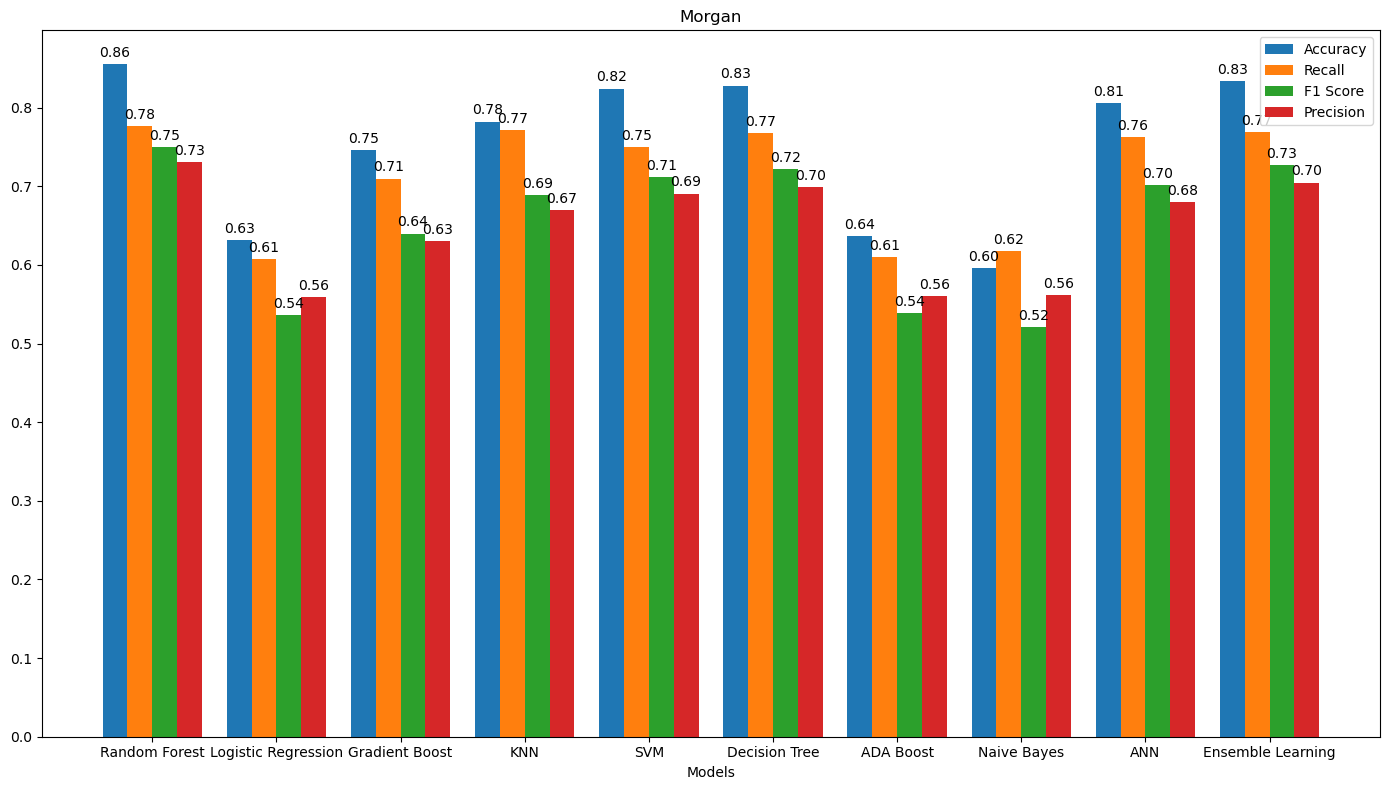

In [44]:
# Model names
models = ['Random Forest', 'Logistic Regression', 'Gradient Boost', 'KNN', 'SVM', 'Decision Tree', 'ADA Boost', 'Naive Bayes', 'ANN', 'Ensemble Learning']

# Metrics
accuracies = [metrics['accuracy'] for metrics in metrics_list]
recalls = [metrics['recall'] for metrics in metrics_list]
f1_scores = [metrics['f1'] for metrics in metrics_list]
precisions = [metrics['precision'] for metrics in metrics_list]

x = np.arange(len(models))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, recalls, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, f1_scores, width, label='F1 Score')
rects4 = ax.bar(x + 1.5*width, precisions, width, label='Precision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Morgan')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.
def add_labels(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X3_resampled)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X3_resampled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Activity Status'] = Y_resampled

# Create a DataFrame for the t-SNE results
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Activity Status'] = Y_resampled

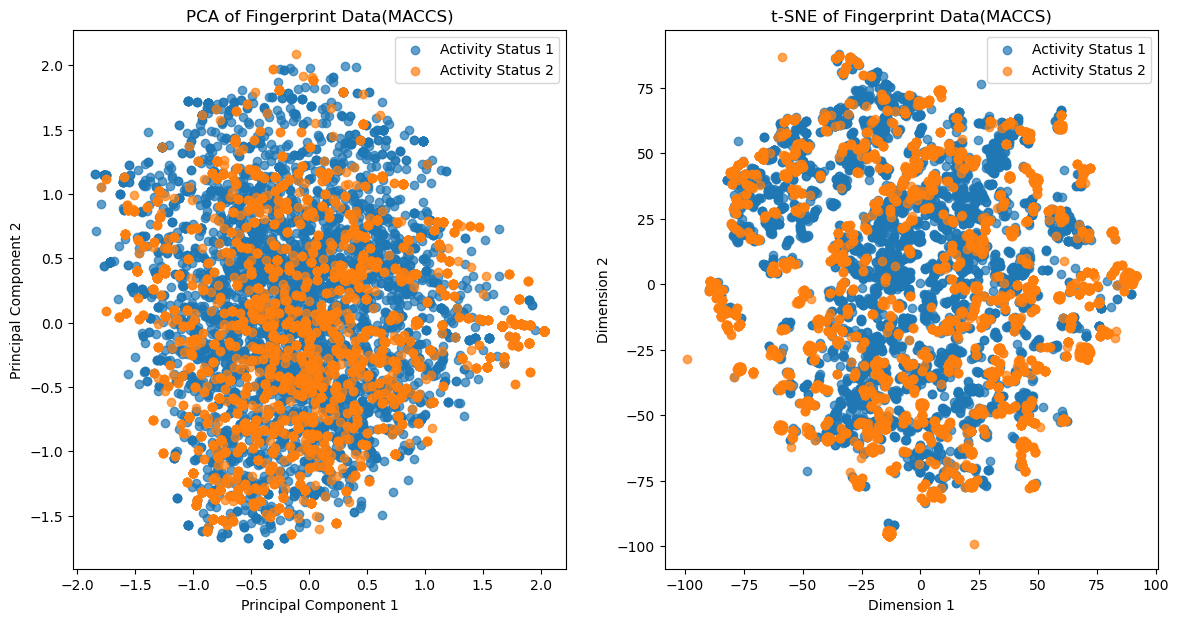

In [46]:
# Plot PCA
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
for status in [1, 2]:
    subset = df_pca[df_pca['Activity Status'] == status]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Activity Status {status}', alpha=0.7)
plt.title('PCA of Fingerprint Data(MACCS)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
for status in [1, 2]:
    subset = df_tsne[df_tsne['Activity Status'] == status]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=f'Activity Status {status}', alpha=0.7)
plt.title('t-SNE of Fingerprint Data(MACCS)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

plt.show()

In [27]:
# Ensure all DataFrames have the same number of rows and are aligned by index
# Assuming all DataFrames have the same number of rows and are in the correct order

# Reset index to ensure alignment
X_resampled = X_resampled.reset_index(drop=True)
X1_resampled = X1_resampled.reset_index(drop=True)
X2_resampled = X2_resampled.reset_index(drop=True)
X3_resampled = X3_resampled.reset_index(drop=True)

# Concatenate DataFrames along columns
fingerprint_df = pd.concat([X_resampled, X1_resampled, X2_resampled, X3_resampled], axis=1)


In [28]:
fingerprint_df.shape

(9212, 6311)

In [29]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality, keeping enough components to explain a high percentage of variance
pca = PCA(n_components=100)  # Adjust n_components as needed
reduced_data = pca.fit_transform(fingerprint_df)

# Now calculate the correlation matrix on the reduced data
correlation_matrix = pd.DataFrame(reduced_data).corr()


In [24]:
correlation_matrix1 = X_resampled.corr()
correlation_matrix2 = X1_resampled.corr()
correlation_matrix3 = X2_resampled.corr()
correlation_matrix4 = X3_resampled.corr()

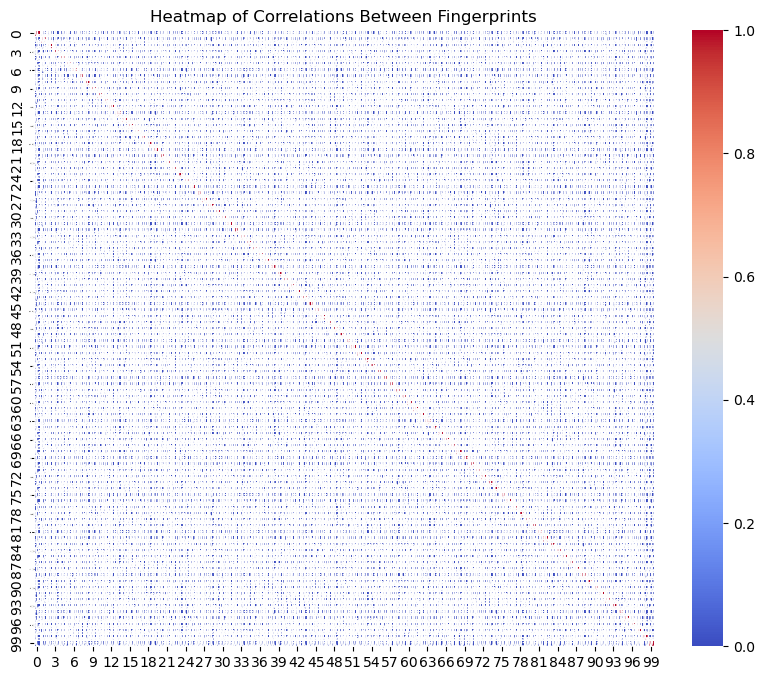

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations Between Fingerprints')
plt.show()

In [36]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Fingerprint': ['Atom Pair', 'RDKit', 'MACCS', 'Morgan'] * 10,  # 4 * 10 = 40 elements
    'Model': [
        'RF', 'RF', 'RF', 'RF',
        'LR', 'LR', 'LR', 'LR',
        'GBoost', 'GBoost', 'GBoost', 'GBoost',
        'KNN', 'KNN', 'KNN', 'KNN',
        'SVM', 'SVM', 'SVM', 'SVM',
        'DeciTree', 'DeciTree', 'DeciTree', 'DeciTree',
        'ADABoost', 'ADABoost', 'ADABoost', 'ADABoost',
        'NaiveBayes', 'NaiveBayes', 'NaiveBayes', 'NaiveBayes',
        'ANN', 'ANN', 'ANN', 'ANN',
        'EnsembleModel', 'EnsembleModel', 'EnsembleModel', 'EnsembleModel'
    ],  # 40 elements
    'Value': [
        0.900, 0.900, 0.900, 0.860,  # RF
        0.790, 0.870, 0.710, 0.630,  # LR
        0.840, 0.860, 0.790, 0.750,  # GBoost
        0.830, 0.820, 0.840, 0.780,  # KNN
        0.900, 0.900, 0.880, 0.820,  # SVM
        0.800, 0.620, 0.860, 0.830,  # DeciTree
        0.740, 0.780, 0.700, 0.640,  # ADABoost
        0.650, 0.650, 0.610, 0.600,  # NaiveBayes
        0.890, 0.890, 0.880, 0.810,  # ANN
        0.890, 0.900, 0.890, 0.830   # EnsembleModel
    ]  # 40 elements
}

# Create a DataFrame
df = pd.DataFrame(data)

desired_order = ['RF', 'LR', 'GBoost', 'KNN', 'SVM', 'DeciTree', 'ADABoost', 'NaiveBayes', 'ANN', 'EnsembleModel']

# Pivot the DataFrame to create a matrix suitable for a heatmap
matrix = df.pivot(index='Fingerprint', columns='Model', values='Value')[desired_order]

print(matrix)


Model          RF    LR  GBoost   KNN   SVM  DeciTree  ADABoost  NaiveBayes  \
Fingerprint                                                                   
Atom Pair    0.90  0.79    0.84  0.83  0.90      0.80      0.74        0.65   
MACCS        0.90  0.71    0.79  0.84  0.88      0.86      0.70        0.61   
Morgan       0.86  0.63    0.75  0.78  0.82      0.83      0.64        0.60   
RDKit        0.90  0.87    0.86  0.82  0.90      0.62      0.78        0.65   

Model         ANN  EnsembleModel  
Fingerprint                       
Atom Pair    0.89           0.89  
MACCS        0.88           0.89  
Morgan       0.81           0.83  
RDKit        0.89           0.90  


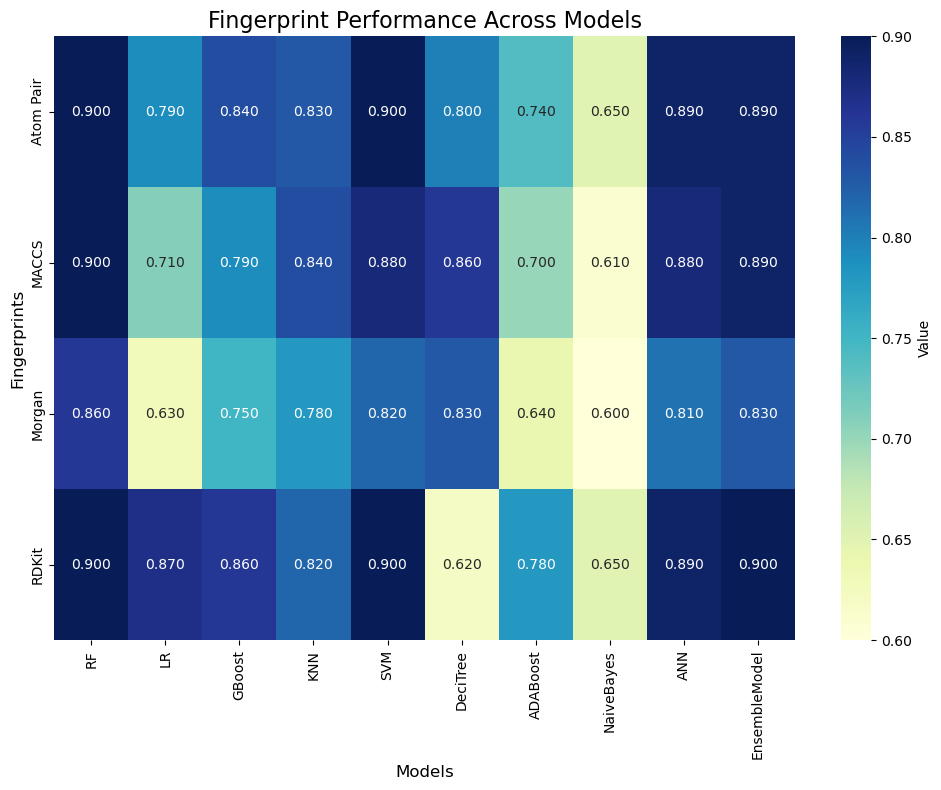

In [43]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(matrix, annot=True, cmap='YlGnBu', fmt='.3f', 
            cbar_kws={'label': 'Value'})

# Customize the plot
plt.title('Fingerprint Performance Across Models', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Fingerprints', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

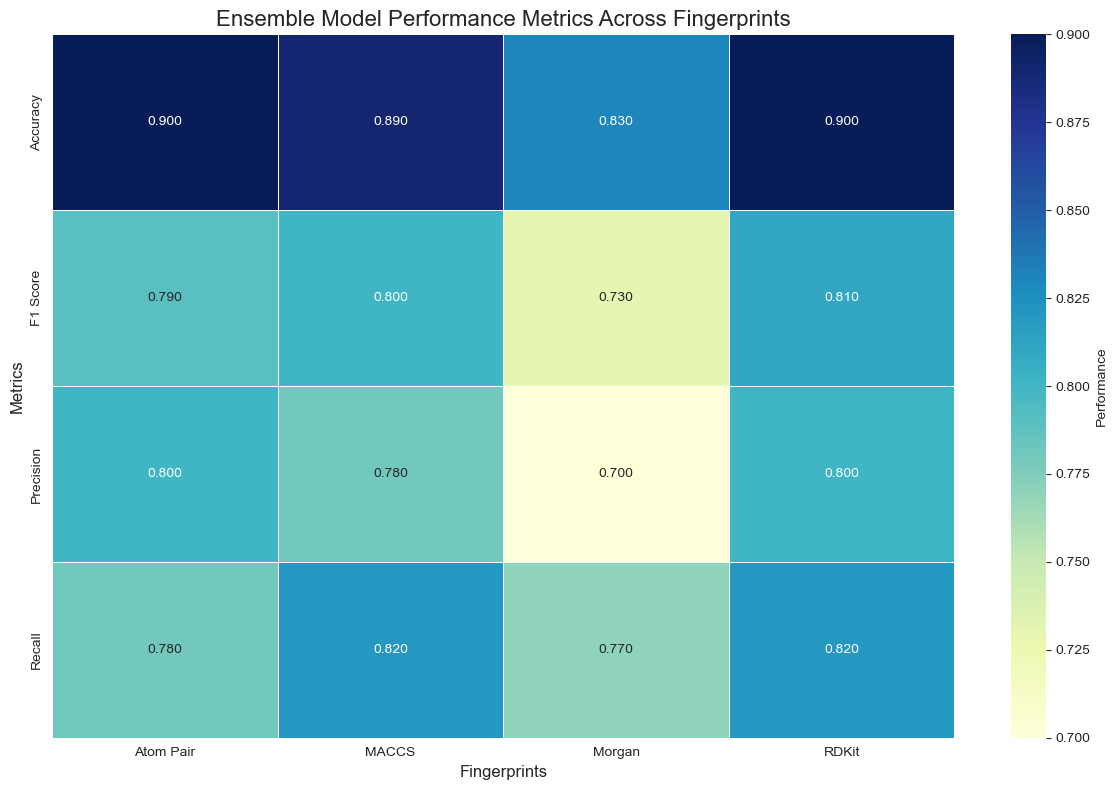

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'] * 4,
    'Fingerprint': ['Atom Pair'] * 4 + ['RDKit'] * 4 + ['MACCS'] * 4 + ['Morgan'] * 4,
    'Value': [
        0.900, 0.800, 0.780, 0.790,  # Atom Pair
        0.900, 0.800, 0.820, 0.810,  # RDKit
        0.890, 0.780, 0.820, 0.800,  # MACCS
        0.830, 0.700, 0.770, 0.730   # Morgan
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the DataFrame to create a matrix suitable for heatmap
matrix = df.pivot(index='Metric', columns='Fingerprint', values='Value')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap
sns.heatmap(matrix, annot=True, fmt='.3f', cmap='YlGnBu', center=np.median(df['Value']),
            cbar_kws={'label': 'Performance'}, linewidths=0.5)

# Customize the plot
plt.title('Ensemble Model Performance Metrics Across Fingerprints', fontsize=16)
plt.xlabel('Fingerprints', fontsize=12)
plt.ylabel('Metrics', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Optionally, save the plot
# plt.savefig('ensemble_fingerprint_metrics_expressive.png', dpi=300, bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations Between Fingerprints')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations Between Fingerprints')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations Between Fingerprints')
plt.show()

df_percent.describe()

In [415]:
df_percent_eff = df_percent[df_percent['Standard Type']== 'Percent Effect']

In [416]:
df_percent_eff

Smiles   Standard Type  \
167     O=C(CC1CCCC1)N[C@H]1CN(Cc2c[nH]cn2)C[C@@H]1C1CC1  Percent Effect   
168           CCN(CC(=O)N(C)C)C(=O)c1ccc(-c2nc(C)cs2)cc1  Percent Effect   
169                  CC(C(=O)NCCc1ccc2c(c1)OCCO2)n1cncn1  Percent Effect   
170                       COc1ccc(CC(C)Nc2cccc(SC)c2)cc1  Percent Effect   
171                Cc1c(C(=O)N2CCCN(S(C)(=O)=O)CC2)cnn1C  Percent Effect   
...                                                  ...             ...   
70113               Cc1cc(C)n(CC(C)NCc2cnc3c(C)cccn23)n1  Percent Effect   
70114  CC(C)=CCN1C[C@H]2CC[C@@H]1CN(C(=O)c1c[nH]c(=O)...  Percent Effect   
70115  Cn1cc(C[C@H]2[C@H](N3CCOCC3)CCN2C(=O)c2ccco2)c...  Percent Effect   
70116    Cc1nccc([C@H]2C[C@@H]3CCN(Cc4ccco4)C[C@H]3O2)n1  Percent Effect   
70117  O=C(O)C(F)(F)F.O=C1CO[C@@H]2CN(CC3CC3)C[C@H]2N...  Percent Effect   

       Standard Value Standard Units  
167            12.770              %  
168             1.176              %  
169             8.235              %  
170            20.000              %  
171            10.590              %  
...               ...            ...  
70113          11.290              %  
70114          17.140              %  
70115           8.029              %  
70116          16.360              %  
70117           5.882              %  

[62611 rows x 4 columns]

In [796]:
df_inhib

Smiles Standard Type  \
0       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
3       CCn1c(=O)/c(=C/C=C2\Sc3cc(C(F)(F)F)ccc3N2C)s/c...    Inhibition   
5       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
6       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
7       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
...                                                   ...           ...   
277565                         COc1cc(OC)c2ccc(=O)oc2c1OC    Inhibition   
277730    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
277827                   O=C1NC(=O)/C(=C/c2c(F)cccc2Br)S1    Inhibition   
277870    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   
278005      COc1cccc2c1C(=O)c1c(oc3c1c(=O)oc1ccccc13)C2=O    Inhibition   

        Standard Value Standard Units  
0                88.90              %  
3                33.30              %  
5                36.80              %  
6                66.20              %  
7                92.80              %  
...                ...            ...  
277565           91.00              %  
277730            5.16              %  
277827           36.00              %  
277870            6.19              %  
278005            2.98              %  

[10898 rows x 4 columns]

In [801]:
df_inhib = df_percent[df_percent['Standard Type']== 'Inhibition']

In [802]:
df_inhib

Smiles Standard Type  \
0       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
3       CCn1c(=O)/c(=C/C=C2\Sc3cc(C(F)(F)F)ccc3N2C)s/c...    Inhibition   
5       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
6       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
7       CCn1c(=O)/c(=C/C=C2\Sc3ccccc3N2C)s/c1=C\c1sc2c...    Inhibition   
...                                                   ...           ...   
277565                         COc1cc(OC)c2ccc(=O)oc2c1OC    Inhibition   
277730    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
277827                   O=C1NC(=O)/C(=C/c2c(F)cccc2Br)S1    Inhibition   
277870    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   
278005      COc1cccc2c1C(=O)c1c(oc3c1c(=O)oc1ccccc13)C2=O    Inhibition   

        Standard Value Standard Units  
0                88.90              %  
3                33.30              %  
5                36.80              %  
6                66.20              %  
7                92.80              %  
...                ...            ...  
277565           91.00              %  
277730            5.16              %  
277827           36.00              %  
277870            6.19              %  
278005            2.98              %  

[10898 rows x 4 columns]

In [797]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.20)
    Q3 = df[column].quantile(0.80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [803]:
df_inhib = remove_outliers(df_inhib, 'Standard Value')

In [804]:
df_inhib

Smiles Standard Type  \
70146   COc1ccc(C(=O)O[C@@H]2C3C[C@H](OC(=O)c4ccco4)[C...    Inhibition   
70149   CCCCCCCCCCCC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3...    Inhibition   
70151   CC(=O)O[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@](C)(O)...    Inhibition   
70152   CC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)[...    Inhibition   
70155   CCCC(C)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)...    Inhibition   
...                                                   ...           ...   
277267                      COc1ccc2ncc(-c3ccnc(N)n3)n2n1    Inhibition   
277360      CC[C@@H](CO)Nc1ccc2ncc(-c3cccc(C(=O)O)c3)n2n1    Inhibition   
277730    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
277870    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   
278005      COc1cccc2c1C(=O)c1c(oc3c1c(=O)oc1ccccc13)C2=O    Inhibition   

        Standard Value Standard Units  
70146             6.00              %  
70149             6.00              %  
70151             8.60              %  
70152             6.00              %  
70155             6.00              %  
...                ...            ...  
277267            4.20              %  
277360           13.50              %  
277730            5.16              %  
277870            6.19              %  
278005            2.98              %  

[9905 rows x 4 columns]

In [819]:
# Apply log transformation
df_inhib['Log_Standard_Value'] = np.log1p(df_inhib['Standard Value'])

/var/folders/gm/brh165c568qf0d9ggn2qd6zr0000gn/T/ipykernel_74637/1895709611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inhib['Log_Standard_Value'] = np.log1p(df_inhib['Standard Value'])


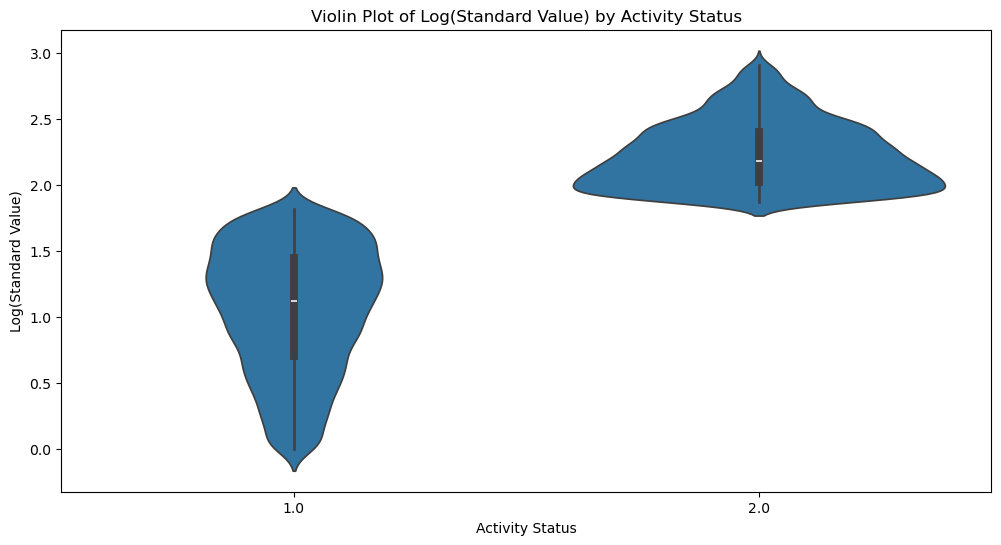

In [844]:
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Activity', y='Log_Standard_Value', data=df_inhib)
plt.title('Violin Plot of Log(Standard Value) by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Log(Standard Value)')
plt.show()

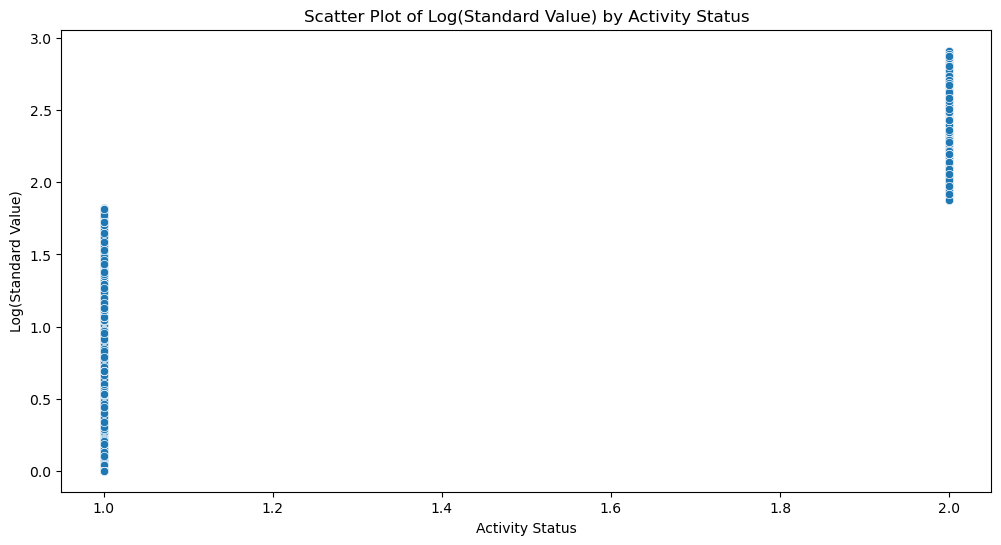

In [845]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Activity', y='Log_Standard_Value', data=df_inhib)
plt.title('Scatter Plot of Log(Standard Value) by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Log(Standard Value)')
plt.show()

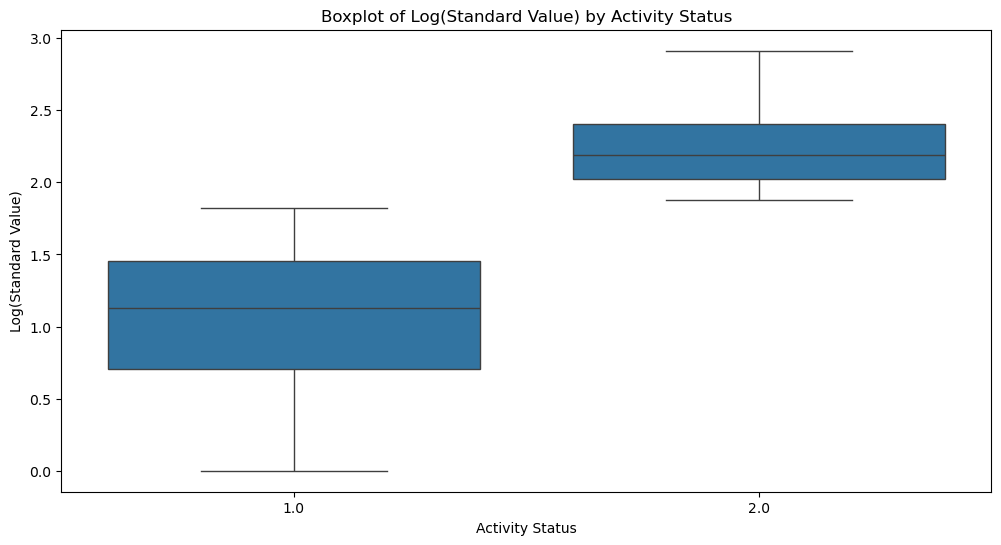

In [843]:
# If you still want a boxplot, here's how to create it with the cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='Log_Standard_Value', data=df_inhib)
plt.title('Boxplot of Log(Standard Value) by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Log(Standard Value)')
plt.show()

In [896]:
# Calculate specific percentiles for filtered data
ptiles = [10, 25, 50,55,70, 75,77.5,80, 90]
values = df_inhib['Standard Value'].quantile([p / 100 for p in ptiles])
print(values)


0.100    0.540
0.250    1.350
0.500    2.750
0.550    3.080
0.700    4.350
0.750    4.960
0.775    5.620
0.800    6.030
0.900    8.412
Name: Standard Value, dtype: float64


In [863]:
def classify_value1(value):
    if value < 4.350:
        return "inactive"
    elif threshold1 <= value < threshold2:
        return "intermediate"
    elif value >= 4.960:
        return "active"
    else:
        return "undefined"  # This case shouldn't occur if thresholds are correctly defined


In [900]:
from skimage.filters import threshold_otsu
import numpy as np

# Convert the column to a numpy array
values = df_inhib_AP['Standard Value'].values

# Calculate Otsu's threshold
otsu_threshold = threshold_otsu(values)
print(f"Otsu's threshold: {otsu_threshold}")

Otsu's threshold: 5.199609375


In [906]:
def classify_otsu(value, threshold):
    return 'active' if value >= threshold else 'inactive'

In [907]:
df_inhib_AP['Activity'] = df_inhib_AP['Standard Value'].apply(lambda x: classify_otsu(x, otsu_threshold))
df_inhib_AP

/var/folders/gm/brh165c568qf0d9ggn2qd6zr0000gn/T/ipykernel_74637/2861209759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inhib_AP['Activity'] = df_inhib_AP['Standard Value'].apply(lambda x: classify_otsu(x, otsu_threshold))


Unnamed: 0.1  Unnamed: 0  \
0                0       70146   
1                1       70149   
2                2       70151   
3                3       70152   
4                4       70155   
...            ...         ...   
9654          9654      276990   
9655          9655      277267   
9656          9656      277360   
9657          9657      277730   
9658          9658      277870   

                                                 Smiles Standard Type  \
0     COc1ccc(C(=O)O[C@@H]2C3C[C@H](OC(=O)c4ccco4)[C...    Inhibition   
1     CCCCCCCCCCCC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3...    Inhibition   
2     CC(=O)O[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@](C)(O)...    Inhibition   
3     CC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)[...    Inhibition   
4     CCCC(C)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)...    Inhibition   
...                                                 ...           ...   
9654            COc1ccc2ncc(-c3ccnc([S+](C)[O-])n3)n2n1    Inhibition   
9655                      COc1ccc2ncc(-c3ccnc(N)n3)n2n1    Inhibition   
9656      CC[C@@H](CO)Nc1ccc2ncc(-c3cccc(C(=O)O)c3)n2n1    Inhibition   
9657    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
9658    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   

      Standard Value Standard Units  Log_Standard_Value  Activity  AtomPair_0  \
0               6.00              %            1.945910    active           1   
1               6.00              %            1.945910    active           1   
2               8.60              %            2.261763    active           1   
3               6.00              %            1.945910    active           1   
4               6.00              %            1.945910    active           1   
...              ...            ...                 ...       ...         ...   
9654           13.70              %            2.687847    active           0   
9655            4.20              %            1.648659  inactive           0   
9656           13.50              %            2.674149    active           0   
9657            5.16              %            1.818077  inactive           0   
9658            6.19              %            1.972691    active           0   

      AtomPair_1  ...  AtomPair_2039  AtomPair_2040  AtomPair_2041  \
0              1  ...              0              1              0   
1              1  ...              0              0              0   
2              1  ...              0              0              0   
3              1  ...              0              0              0   
4              1  ...              0              1              0   
...          ...  ...            ...            ...            ...   
9654           0  ...              0              0              0   
9655           0  ...              0              0              0   
9656           0  ...              0              0              0   
9657           0  ...              0              0              0   
9658           0  ...              0              0              0   

      AtomPair_2042  AtomPair_2043  AtomPair_2044  AtomPair_2045  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
9654              0              0              1              0   
9655              0              0              0              0   
9656              0              0              0              0   
9657              0              0              0              0   
9658              0              0              0              0   

      AtomPair_2046  AtomPair_2047  classification  
0                 0              0  

In [864]:
df_inhib_AP['Activity'] = df_inhib_AP['Standard Value'].apply(classify_value1)
df_inhib_AP

Unnamed: 0.1  Unnamed: 0  \
0                0       70146   
1                1       70149   
2                2       70151   
3                3       70152   
4                4       70155   
...            ...         ...   
9655          9655      277267   
9656          9656      277360   
9657          9657      277730   
9658          9658      277870   
9659          9659      278005   

                                                 Smiles Standard Type  \
0     COc1ccc(C(=O)O[C@@H]2C3C[C@H](OC(=O)c4ccco4)[C...    Inhibition   
1     CCCCCCCCCCCC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3...    Inhibition   
2     CC(=O)O[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@](C)(O)...    Inhibition   
3     CC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)[...    Inhibition   
4     CCCC(C)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)...    Inhibition   
...                                                 ...           ...   
9655                      COc1ccc2ncc(-c3ccnc(N)n3)n2n1    Inhibition   
9656      CC[C@@H](CO)Nc1ccc2ncc(-c3cccc(C(=O)O)c3)n2n1    Inhibition   
9657    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
9658    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   
9659      COc1cccc2c1C(=O)c1c(oc3c1c(=O)oc1ccccc13)C2=O    Inhibition   

      Standard Value Standard Units  Log_Standard_Value      Activity  \
0               6.00              %            1.945910        active   
1               6.00              %            1.945910        active   
2               8.60              %            2.261763        active   
3               6.00              %            1.945910        active   
4               6.00              %            1.945910        active   
...              ...            ...                 ...           ...   
9655            4.20              %            1.648659        active   
9656           13.50              %            2.674149        active   
9657            5.16              %            1.818077        active   
9658            6.19              %            1.972691        active   
9659            2.98              %            1.381282  intermediate   

      AtomPair_0  AtomPair_1  ...  AtomPair_2038  AtomPair_2039  \
0              1           1  ...              0              0   
1              1           1  ...              0              0   
2              1           1  ...              0              0   
3              1           1  ...              0              0   
4              1           1  ...              0              0   
...          ...         ...  ...            ...            ...   
9655           0           0  ...              0              0   
9656           0           0  ...              0              0   
9657           0           0  ...              0              0   
9658           0           0  ...              0              0   
9659           0           0  ...              0              0   

      AtomPair_2040  AtomPair_2041  AtomPair_2042  AtomPair_2043  \
0                 1              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 1              0              0              0   
...             ...            ...            ...            ...   
9655              0              0              0              0   
9656              0              0              0              0   
9657              0              0              0              0   
9658              0              0              0              0   
9659              0              0              0              0   

      AtomPair_2044  AtomPair_2045  AtomPair_2046  AtomPair_2047  
0                 0              0              0              0  
1                 0              0              0              0  
2                 0 

In [912]:
activity_mapping = {
    'active': 2.0,
    'intermediate': 0.0,
    'inactive': 1.0
}
df_inhib_AP['Activity'] = df_inhib_AP['Activity'].map(activity_mapping)
df_inhib_AP

/var/folders/gm/brh165c568qf0d9ggn2qd6zr0000gn/T/ipykernel_74637/3947979067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inhib_AP['Activity'] = df_inhib_AP['Activity'].map(activity_mapping)


Unnamed: 0.1  Unnamed: 0  \
0                0       70146   
1                1       70149   
2                2       70151   
3                3       70152   
4                4       70155   
...            ...         ...   
9654          9654      276990   
9655          9655      277267   
9656          9656      277360   
9657          9657      277730   
9658          9658      277870   

                                                 Smiles Standard Type  \
0     COc1ccc(C(=O)O[C@@H]2C3C[C@H](OC(=O)c4ccco4)[C...    Inhibition   
1     CCCCCCCCCCCC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3...    Inhibition   
2     CC(=O)O[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@](C)(O)...    Inhibition   
3     CC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)[...    Inhibition   
4     CCCC(C)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)...    Inhibition   
...                                                 ...           ...   
9654            COc1ccc2ncc(-c3ccnc([S+](C)[O-])n3)n2n1    Inhibition   
9655                      COc1ccc2ncc(-c3ccnc(N)n3)n2n1    Inhibition   
9656      CC[C@@H](CO)Nc1ccc2ncc(-c3cccc(C(=O)O)c3)n2n1    Inhibition   
9657    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
9658    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   

      Standard Value Standard Units  Log_Standard_Value  Activity  AtomPair_0  \
0               6.00              %            1.945910       2.0           1   
1               6.00              %            1.945910       2.0           1   
2               8.60              %            2.261763       2.0           1   
3               6.00              %            1.945910       2.0           1   
4               6.00              %            1.945910       2.0           1   
...              ...            ...                 ...       ...         ...   
9654           13.70              %            2.687847       2.0           0   
9655            4.20              %            1.648659       1.0           0   
9656           13.50              %            2.674149       2.0           0   
9657            5.16              %            1.818077       1.0           0   
9658            6.19              %            1.972691       2.0           0   

      AtomPair_1  ...  AtomPair_2039  AtomPair_2040  AtomPair_2041  \
0              1  ...              0              1              0   
1              1  ...              0              0              0   
2              1  ...              0              0              0   
3              1  ...              0              0              0   
4              1  ...              0              1              0   
...          ...  ...            ...            ...            ...   
9654           0  ...              0              0              0   
9655           0  ...              0              0              0   
9656           0  ...              0              0              0   
9657           0  ...              0              0              0   
9658           0  ...              0              0              0   

      AtomPair_2042  AtomPair_2043  AtomPair_2044  AtomPair_2045  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
9654              0              0              1              0   
9655              0              0              0              0   
9656              0              0              0              0   
9657              0              0              0              0   
9658              0              0              0              0   

      AtomPair_2046  AtomPair_2047  classification  
0                 0              0  

In [870]:
df_inhib_AP = df_inhib_AP[df_inhib_AP['Activity'] != 0.0]

In [911]:
column_name = 'Activity'
if column_name in df_inhib_AP.columns and df_inhib_AP[column_name].dtype == 'object':
    print(df_inhib_AP[column_name].value_counts())
    print("***" * 10)

Activity
inactive    6959
active      2231
Name: count, dtype: int64
******************************


In [913]:
column_name = 'Activity'
if column_name in df_inhib_AP.columns and df_inhib_AP[column_name].dtype == 'float':
    print(df_inhib_AP[column_name].value_counts())
    print("***" * 10)

Activity
1.0    6959
2.0    2231
Name: count, dtype: int64
******************************


In [885]:
df_inhib_AP

Unnamed: 0.1  Unnamed: 0  \
0                0       70146   
1                1       70149   
2                2       70151   
3                3       70152   
4                4       70155   
...            ...         ...   
9654          9654      276990   
9655          9655      277267   
9656          9656      277360   
9657          9657      277730   
9658          9658      277870   

                                                 Smiles Standard Type  \
0     COc1ccc(C(=O)O[C@@H]2C3C[C@H](OC(=O)c4ccco4)[C...    Inhibition   
1     CCCCCCCCCCCC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3...    Inhibition   
2     CC(=O)O[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@](C)(O)...    Inhibition   
3     CC(=O)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)[...    Inhibition   
4     CCCC(C)O[C@@H]1C2C[C@H](OC(=O)c3ccco3)[C@]3(C)...    Inhibition   
...                                                 ...           ...   
9654            COc1ccc2ncc(-c3ccnc([S+](C)[O-])n3)n2n1    Inhibition   
9655                      COc1ccc2ncc(-c3ccnc(N)n3)n2n1    Inhibition   
9656      CC[C@@H](CO)Nc1ccc2ncc(-c3cccc(C(=O)O)c3)n2n1    Inhibition   
9657    O=C1c2cc3ccccc3cc2C(=O)c2c1oc1c2c(=O)oc2ccccc21    Inhibition   
9658    Nc1ccc2oc(=O)c3c4c(oc3c2c1)C(=O)c1c(O)cccc1C4=O    Inhibition   

      Standard Value Standard Units  Log_Standard_Value  Activity  AtomPair_0  \
0               6.00              %            1.945910       2.0           1   
1               6.00              %            1.945910       2.0           1   
2               8.60              %            2.261763       2.0           1   
3               6.00              %            1.945910       2.0           1   
4               6.00              %            1.945910       2.0           1   
...              ...            ...                 ...       ...         ...   
9654           13.70              %            2.687847       2.0           0   
9655            4.20              %            1.648659       2.0           0   
9656           13.50              %            2.674149       2.0           0   
9657            5.16              %            1.818077       2.0           0   
9658            6.19              %            1.972691       2.0           0   

      AtomPair_1  ...  AtomPair_2038  AtomPair_2039  AtomPair_2040  \
0              1  ...              0              0              1   
1              1  ...              0              0              0   
2              1  ...              0              0              0   
3              1  ...              0              0              0   
4              1  ...              0              0              1   
...          ...  ...            ...            ...            ...   
9654           0  ...              0              0              0   
9655           0  ...              0              0              0   
9656           0  ...              0              0              0   
9657           0  ...              0              0              0   
9658           0  ...              0              0              0   

      AtomPair_2041  AtomPair_2042  AtomPair_2043  AtomPair_2044  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
9654              0              0              0              1   
9655              0              0              0              0   
9656              0              0              0              0   
9657              0              0              0              0   
9658              0              0              0              0   

      AtomPair_2045  AtomPair_2046  AtomPair_2047  
0                 0              0   

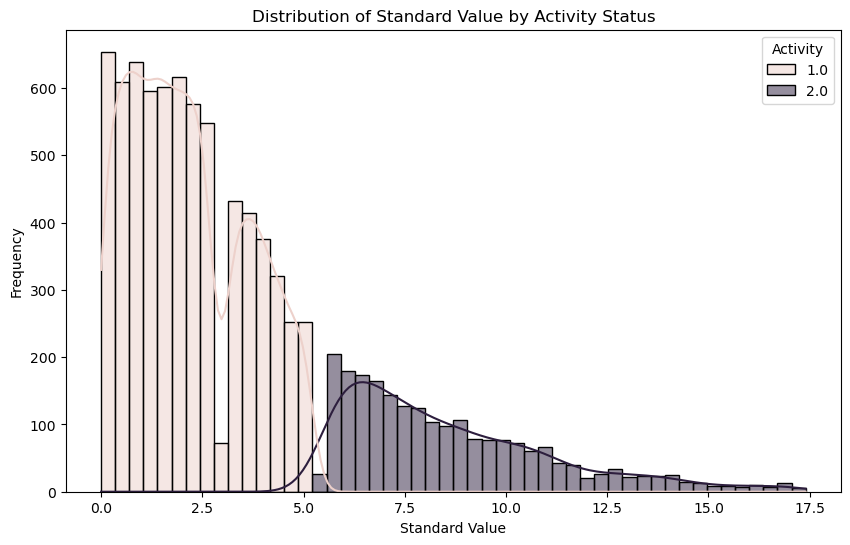

In [914]:
#### Plot distribution of Standard Value by Activity Status
plt.figure(figsize=(10, 6))
sns.histplot(df_inhib_AP, x='Standard Value', hue='Activity', bins=50, kde=True)
plt.title('Distribution of Standard Value by Activity Status')
plt.xlabel('Standard Value')
plt.ylabel('Frequency')
plt.show()


In [846]:
df_inhib.to_csv("df_inhib.csv")

In [847]:
df_inhib_AP = pd.read_csv("df_inhib_AP.csv")


In [883]:
df_inhib_AP.shape

(9190, 2056)

In [882]:
X = df_inhib_AP.drop(columns=['Standard Units','Log_Standard_Value','Smiles','Standard Type','Activity','Standard Value','Unnamed: 0','Unnamed: 0.1'], axis=1)
X

AtomPair_0  AtomPair_1  AtomPair_2  AtomPair_3  AtomPair_4  AtomPair_5  \
0              1           1           1           0           1           1   
1              1           1           1           1           1           1   
2              1           1           1           1           1           1   
3              1           1           1           0           1           1   
4              1           1           1           0           1           1   
...          ...         ...         ...         ...         ...         ...   
9654           0           0           0           0           0           0   
9655           0           0           0           0           0           0   
9656           0           0           0           0           1           1   
9657           0           0           0           0           0           0   
9658           0           0           0           0           0           0   

      AtomPair_6  AtomPair_7  AtomPair_8  AtomPair_9  ...  AtomPair_2038  \
0              0           0           1           1  ...              0   
1              1           0           1           1  ...              0   
2              1           0           0           0  ...              0   
3              0           0           0           0  ...              0   
4              0           0           0           0  ...              0   
...          ...         ...         ...         ...  ...            ...   
9654           0           0           0           0  ...              0   
9655           0           0           0           0  ...              0   
9656           1           0           0           0  ...              0   
9657           0           0           0           0  ...              0   
9658           0           0           0           0  ...              0   

      AtomPair_2039  AtomPair_2040  AtomPair_2041  AtomPair_2042  \
0                 0              1              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              1              0              0   
...             ...            ...            ...            ...   
9654              0              0              0              0   
9655              0              0              0              0   
9656              0              0              0              0   
9657              0              0              0              0   
9658              0              0              0              0   

      AtomPair_2043  AtomPair_2044  AtomPair_2045  AtomPair_2046  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
9654              0              1              0              0   
9655              0              0              0              0   
9656              0              0              0              0   
9657              0              0              0              0   
9658              0              0              0              0   

      AtomPair_2047  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
9654              0  
9655              0  
9656              0  
9657              0  
9658              0  

[9190 rows x 2048 columns]

In [917]:
Y = df_inhib_AP['Activity']
Y

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
9654    2.0
9655    1.0
9656    2.0
9657    1.0
9658    2.0
Name: Activity, Length: 9190, dtype: float64

In [918]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [919]:
X

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [920]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import ast


In [921]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [922]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

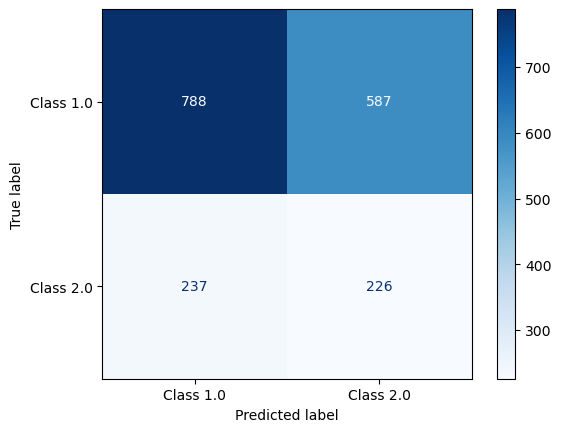

In [923]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred, labels=[1.0, 2.0])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1.0', 'Class 2.0'])
disp.plot(cmap='Blues')
plt.show()


In [924]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_resampled, Y_resampled )

RandomForestClassifier(random_state=42)

In [925]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model1.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep1 = classification_report(Y_test, y_pred)
print(rep1)

0.6964091403699674
              precision    recall  f1-score   support

         1.0       0.76      0.87      0.81      1375
         2.0       0.32      0.19      0.24       463

    accuracy                           0.70      1838
   macro avg       0.54      0.53      0.52      1838
weighted avg       0.65      0.70      0.67      1838



In [926]:
lr = LogisticRegression(solver='saga',max_iter=3000,random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(probability=True)
dt = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
nb = GaussianNB()
mlp = MLPClassifier(random_state=42)

In [929]:
from sklearn.ensemble import RandomForestClassifier

model2 = LogisticRegression(solver='saga',random_state=42)
model2.fit(X_resampled, Y_resampled )

LogisticRegression(random_state=42, solver='saga')

In [930]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model2.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep2 = classification_report(Y_test, y_pred)
print(rep2)

0.6126224156692056
              precision    recall  f1-score   support

         1.0       0.76      0.71      0.73      1375
         2.0       0.27      0.32      0.30       463

    accuracy                           0.61      1838
   macro avg       0.51      0.52      0.51      1838
weighted avg       0.63      0.61      0.62      1838



In [931]:
from sklearn.ensemble import RandomForestClassifier

model3 = GradientBoostingClassifier(random_state=42)
model3.fit(X_resampled, Y_resampled )

GradientBoostingClassifier(random_state=42)

In [932]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model3.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep3 = classification_report(Y_test, y_pred)
print(rep3)

0.6289445048966268
              precision    recall  f1-score   support

         1.0       0.76      0.73      0.75      1375
         2.0       0.29      0.32      0.30       463

    accuracy                           0.63      1838
   macro avg       0.52      0.53      0.52      1838
weighted avg       0.64      0.63      0.64      1838



In [935]:
from sklearn.ensemble import RandomForestClassifier

model4 = KNeighborsClassifier()
model4.fit(X_resampled, Y_resampled )

KNeighborsClassifier()

In [936]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model4.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep4 = classification_report(Y_test, y_pred)
print(rep4)

0.5533188248095756
              precision    recall  f1-score   support

         1.0       0.78      0.56      0.65      1375
         2.0       0.29      0.54      0.38       463

    accuracy                           0.55      1838
   macro avg       0.54      0.55      0.51      1838
weighted avg       0.66      0.55      0.58      1838



In [938]:
from sklearn.ensemble import RandomForestClassifier

model5 = SVC()
model5.fit(X_resampled, Y_resampled )

SVC()

In [939]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model5.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep5 = classification_report(Y_test, y_pred)
print(rep5)

0.6980413492927094
              precision    recall  f1-score   support

         1.0       0.75      0.89      0.81      1375
         2.0       0.29      0.14      0.19       463

    accuracy                           0.70      1838
   macro avg       0.52      0.51      0.50      1838
weighted avg       0.64      0.70      0.66      1838



In [941]:
from sklearn.ensemble import RandomForestClassifier

model6 = DecisionTreeClassifier(random_state=42)
model6.fit(X_resampled, Y_resampled )

DecisionTreeClassifier(random_state=42)

In [942]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model6.predict(X_test)
print(accuracy_score(Y_test, y_pred))
rep6 = classification_report(Y_test, y_pred)
print(rep6)

0.5952121871599565
              precision    recall  f1-score   support

         1.0       0.75      0.68      0.72      1375
         2.0       0.26      0.34      0.30       463

    accuracy                           0.60      1838
   macro avg       0.51      0.51      0.51      1838
weighted avg       0.63      0.60      0.61      1838



In [1024]:
import shap
